In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
import os
from scipy.stats import stats
import numpy as np
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
tickers = ['RIO', 'VALE', 'ECL', 'BHP', 'TX', 'LYB', 'BA', 'LMT', 'GE', 'CAT', 'J', 'MMM', 'BAC', 'V',
           'GS', 'JPM', 'MS', 'SCHW', 'XOM', 'SLB', 'KMI', 'TSLA', 'CVX', 'HAL', 'HD', 'SBUX', 'NKE',
           'MCD', 'CCL', 'BKNG', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'ORCL', 'IBM', 'VZ', 'FB', 'DIS', 'CMCSA',
           'T', 'NFLX', 'RDFN', 'AMT', 'SPG', 'PSA', 'PLD', 'EQIX', 'JNJ', 'PFE', 'UNH', 'MRK', 'ANTM',
           'CI', 'KO', 'CL', 'PG', 'WMT', 'PEP', 'CLX', 'NEE', 'DUK', 'EXC', 'D', 'ES', 'CNP', 'VNQ', 
           'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY', 'GOOG', 'AMZN', 'VTI',
           'VOO', 'BRK-A', 'BRK-B', 'VTSMX', 'SWTSX', 'IWV', 'WFIVX']
start_date = '2010-01-01'
end_date = datetime.now()
for stock in tickers:
    globals()[stock] = data.DataReader(stock, 'yahoo', start_date, end_date)

In [3]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2756 entries, 2010-01-04 to 2020-12-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2756 non-null   float64
 1   Low        2756 non-null   float64
 2   Open       2756 non-null   float64
 3   Close      2756 non-null   float64
 4   Volume     2756 non-null   float64
 5   Adj Close  2756 non-null   float64
dtypes: float64(6)
memory usage: 150.7 KB


In [87]:
materials = [RIO, VALE, ECL, BHP, TX, LYB, XLB]
industrials = [BA, LMT, GE, CAT, J, MMM, XLI]
financials = [BAC, V, GS, JPM, MS, SCHW, XLF]
energy = [XOM, SLB, KMI, TSLA, CVX, HAL, XLE]
consumer_discretionary = [HD, SBUX, NKE, MCD, CCL, BKNG, XLY]
info_tech = [AAPL, MSFT, CSCO, INTC, ORCL, IBM, XLK]
communication = [VZ, FB, DIS, CMCSA, T, NFLX, XLC]
real_estate = [RDFN, AMT, SPG, PSA, PLD, EQIX, VNQ]
health_care = [JNJ, PFE, UNH, MRK, ANTM, CI, XLV]
consumer_staple = [KO, CL, PG, WMT, PEP, CLX, XLP]
utilities = [NEE, DUK, EXC, D, ES, CNP, XLU]
etf = [XLB, XLI, XLF, XLE, XLY, XLK, XLC, VNQ, XLV, XLP, XLU]
random = [GOOG, AMZN, VTI, VOO, VTSMX, SWTSX, IWV, WFIVX]

In [5]:
#calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in materials:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in industrials:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

ma_day = [10, 20, 50]
for ma in ma_day:
    for company in financials:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in energy:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in consumer_discretionary:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in info_tech:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in communication:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in real_estate:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in health_care:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in consumer_staple:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in utilities:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in etf:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

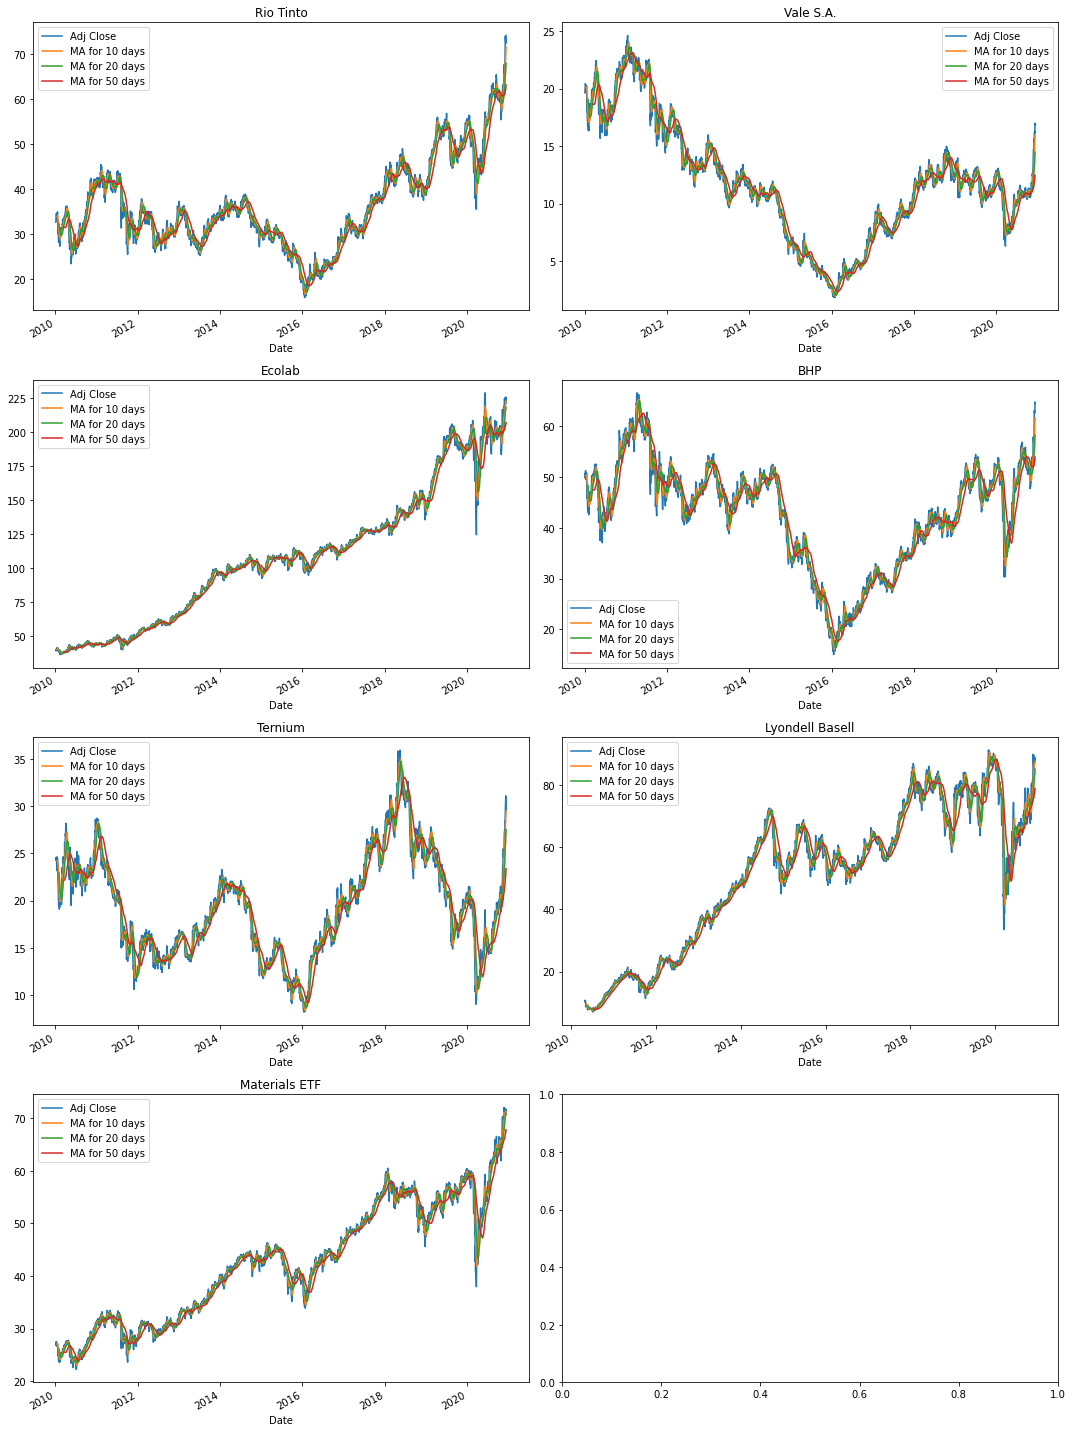

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

RIO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Rio Tinto')

VALE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Vale S.A.')

ECL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Ecolab')

BHP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BHP')

TX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Ternium')

LYB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Lyondell Basell')

XLB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Materials ETF')

fig.tight_layout()

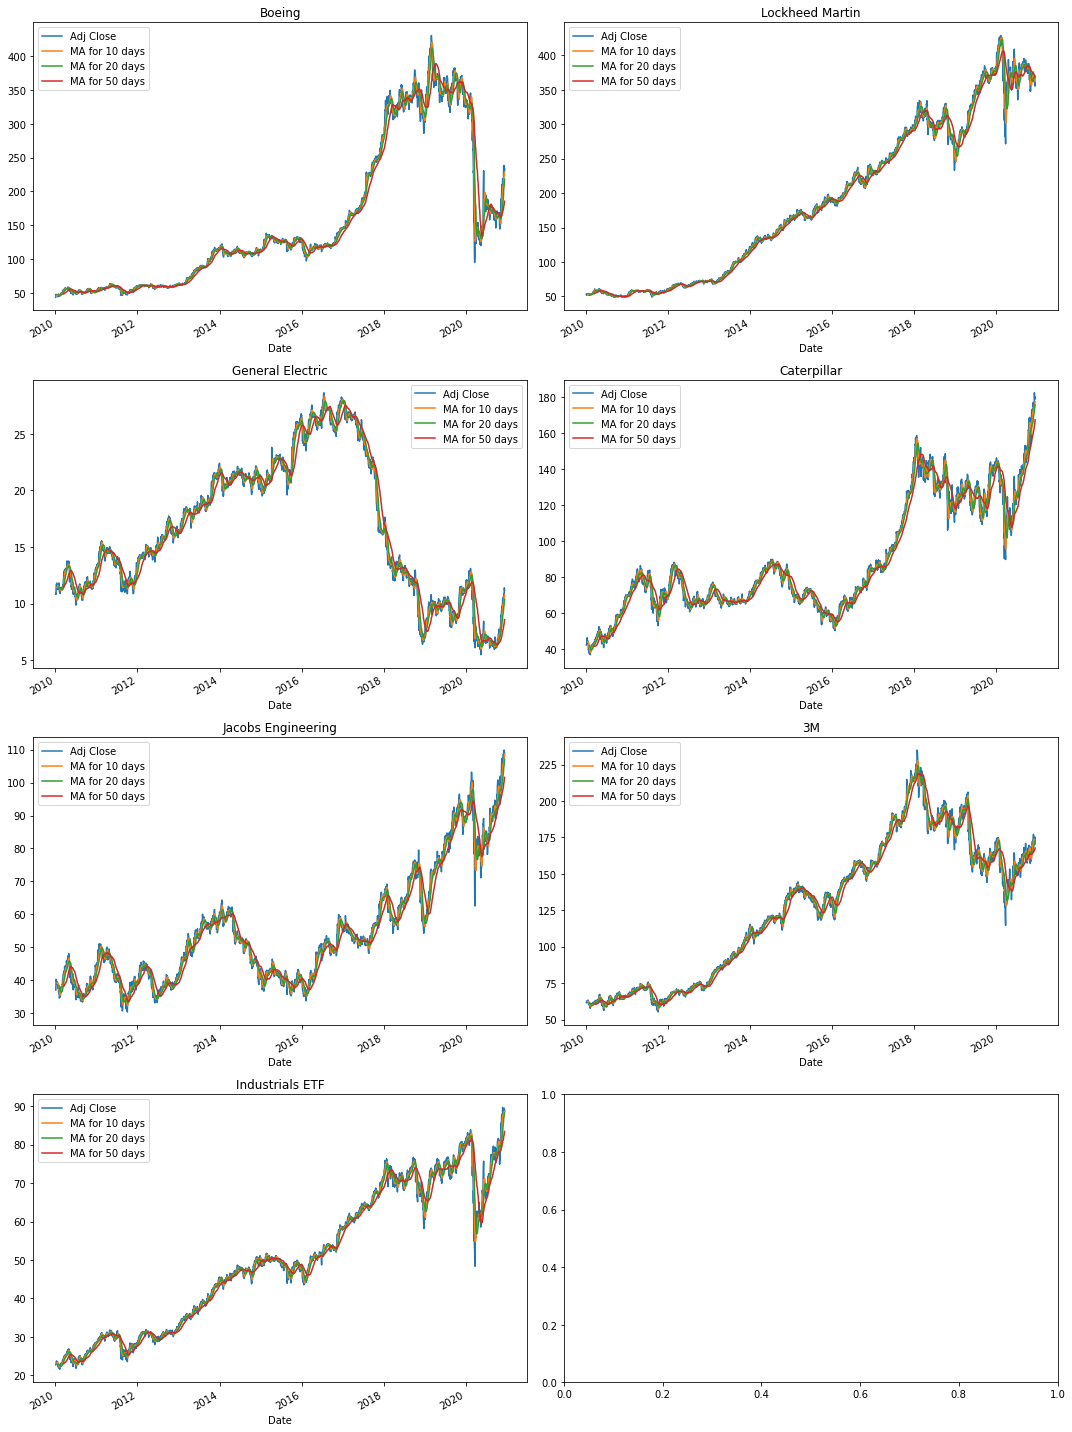

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

BA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Boeing')

LMT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Lockheed Martin')

GE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('General Electric')

CAT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Caterpillar')

J[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Jacobs Engineering')

MMM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('3M')

XLI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Industrials ETF')

fig.tight_layout()

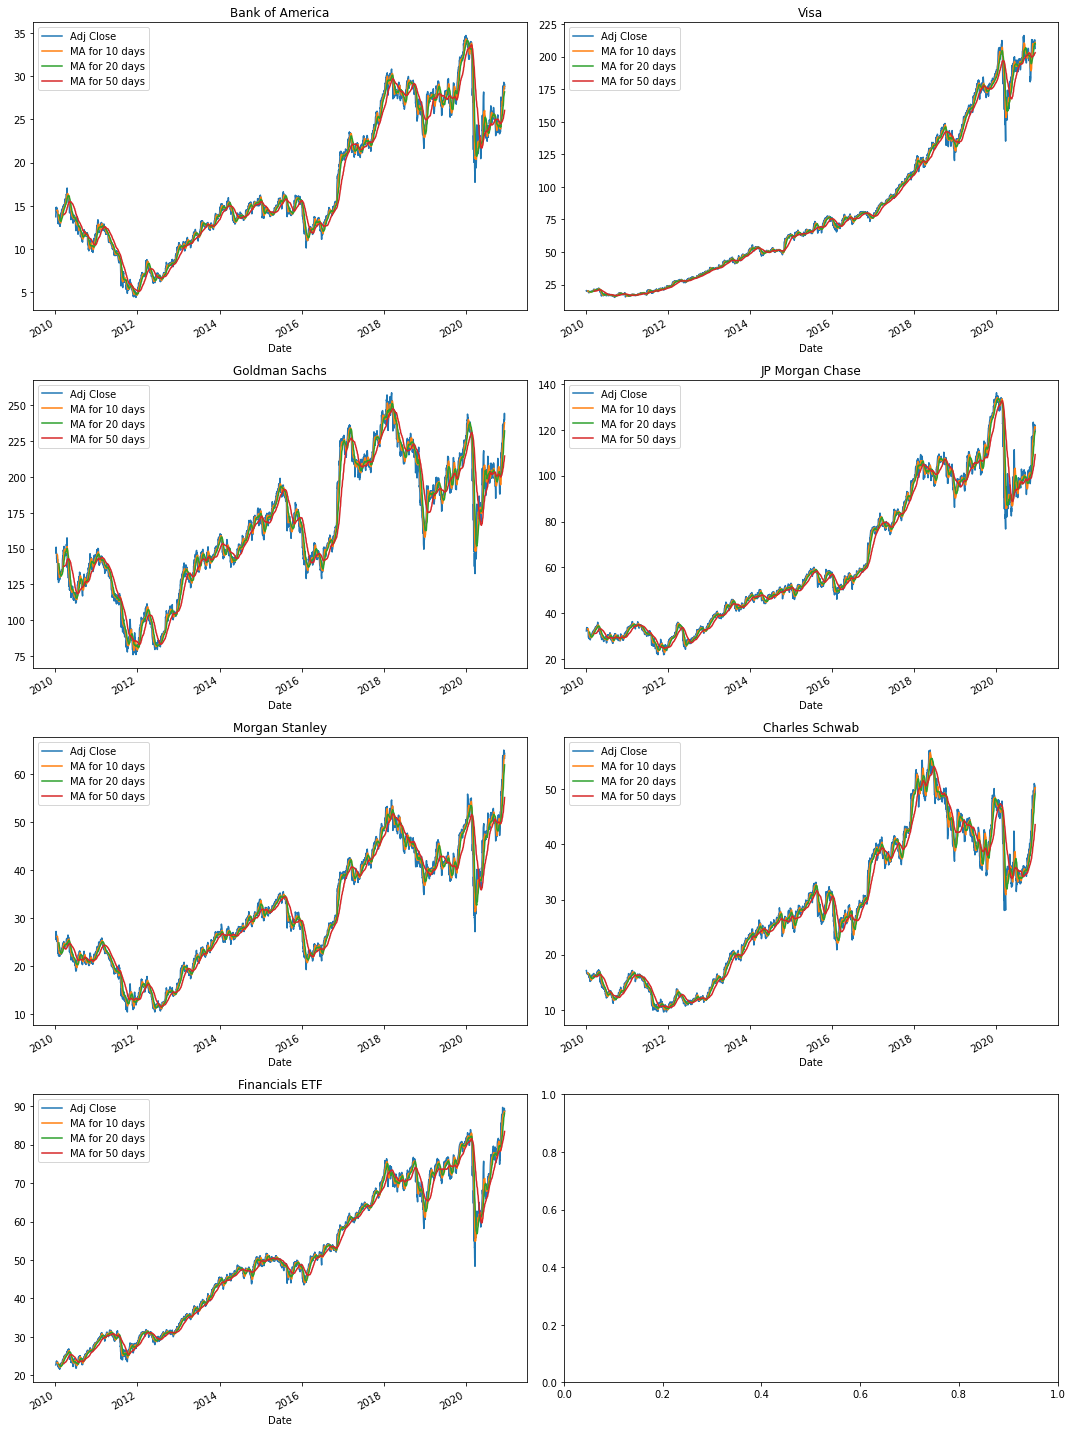

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

BAC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Bank of America')

V[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Visa')

GS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Goldman Sachs')

JPM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('JP Morgan Chase')

MS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Morgan Stanley')

SCHW[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Charles Schwab')

XLI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Financials ETF')

fig.tight_layout()

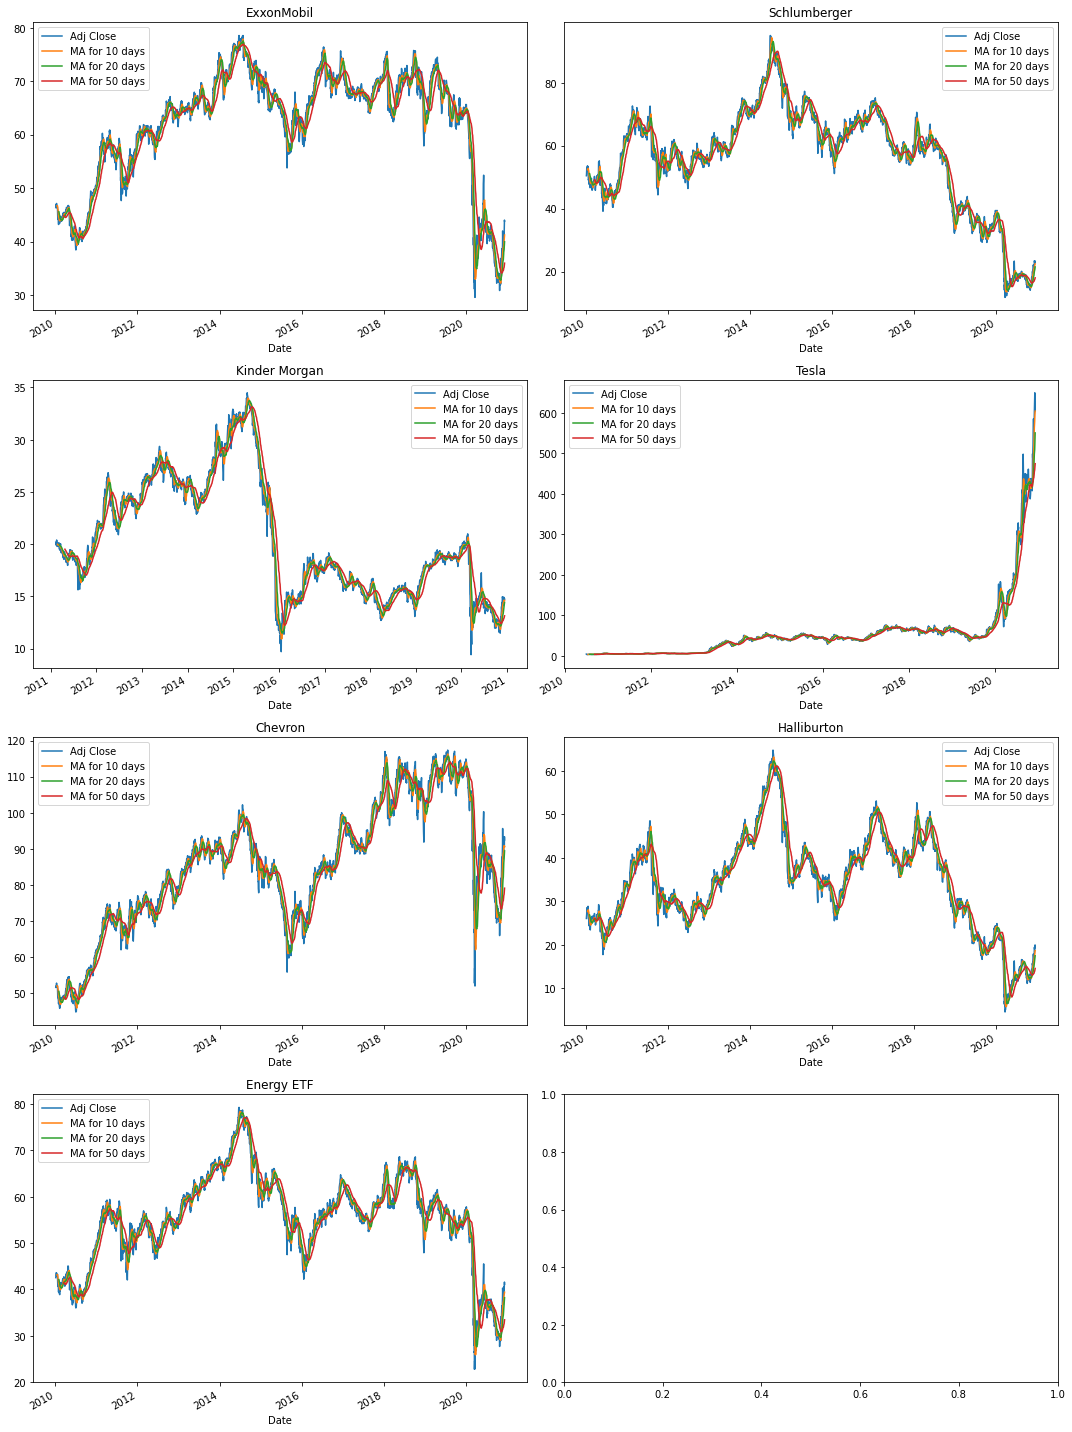

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

XOM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('ExxonMobil')

SLB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Schlumberger')

KMI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Kinder Morgan')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Tesla')

CVX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Chevron')

HAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Halliburton')

XLE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Energy ETF')

fig.tight_layout()

#Need to remove Tesla from energy

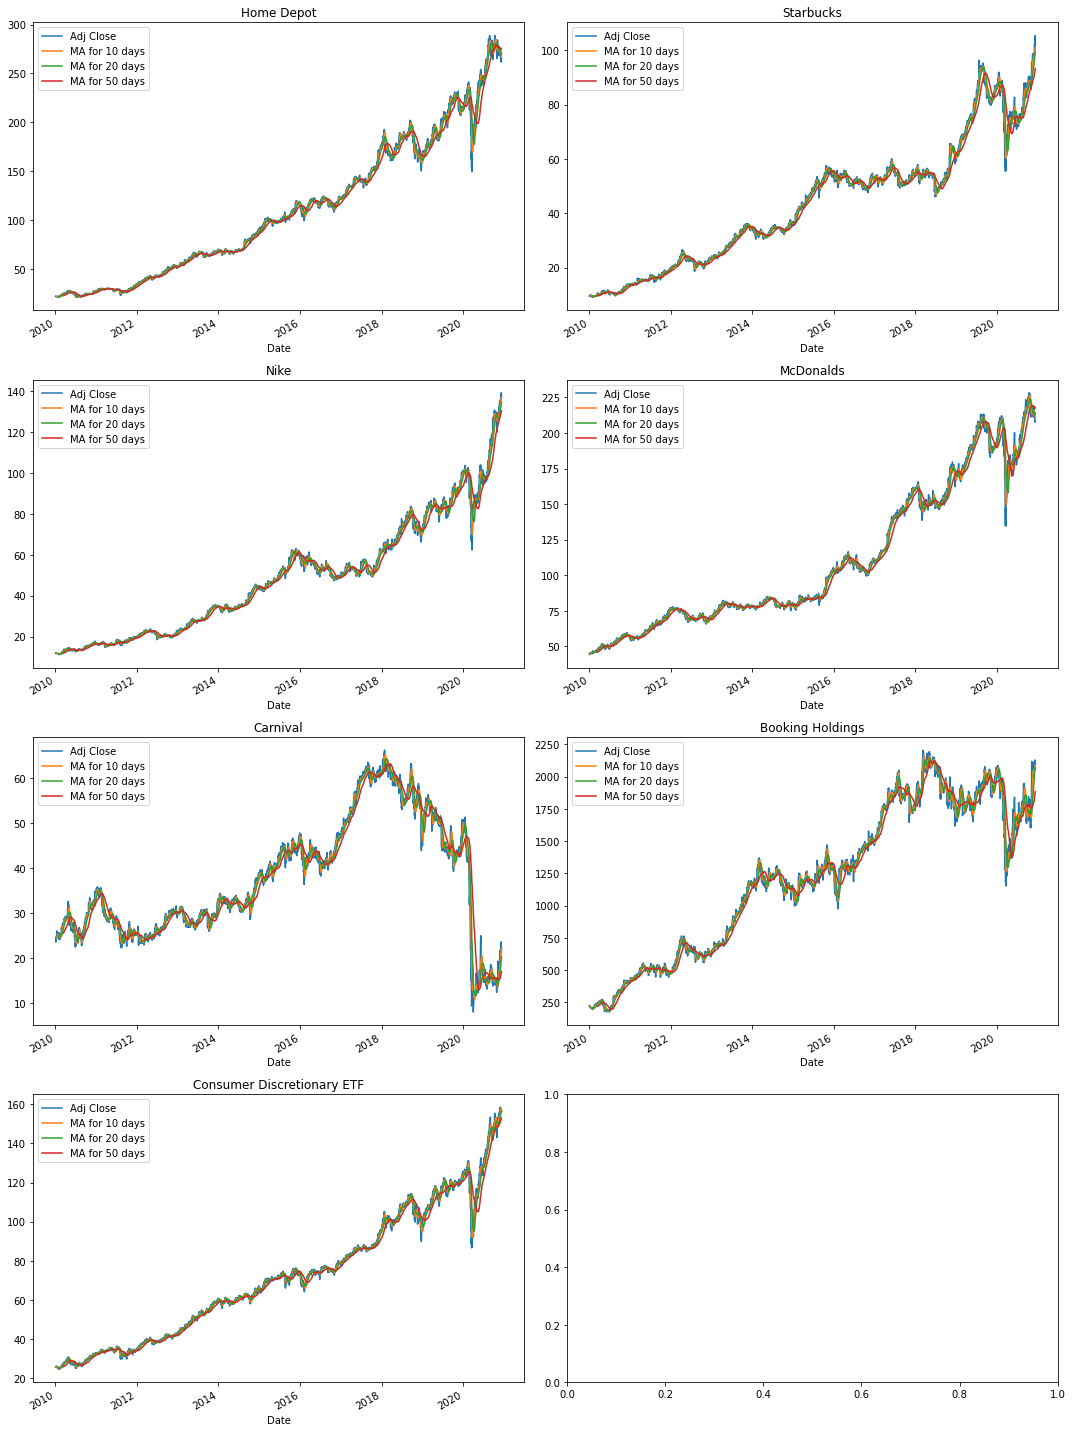

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

HD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Home Depot')

SBUX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Starbucks')

NKE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Nike')

MCD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('McDonalds')

CCL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Carnival')

BKNG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Booking Holdings')

XLY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Consumer Discretionary ETF')

fig.tight_layout()

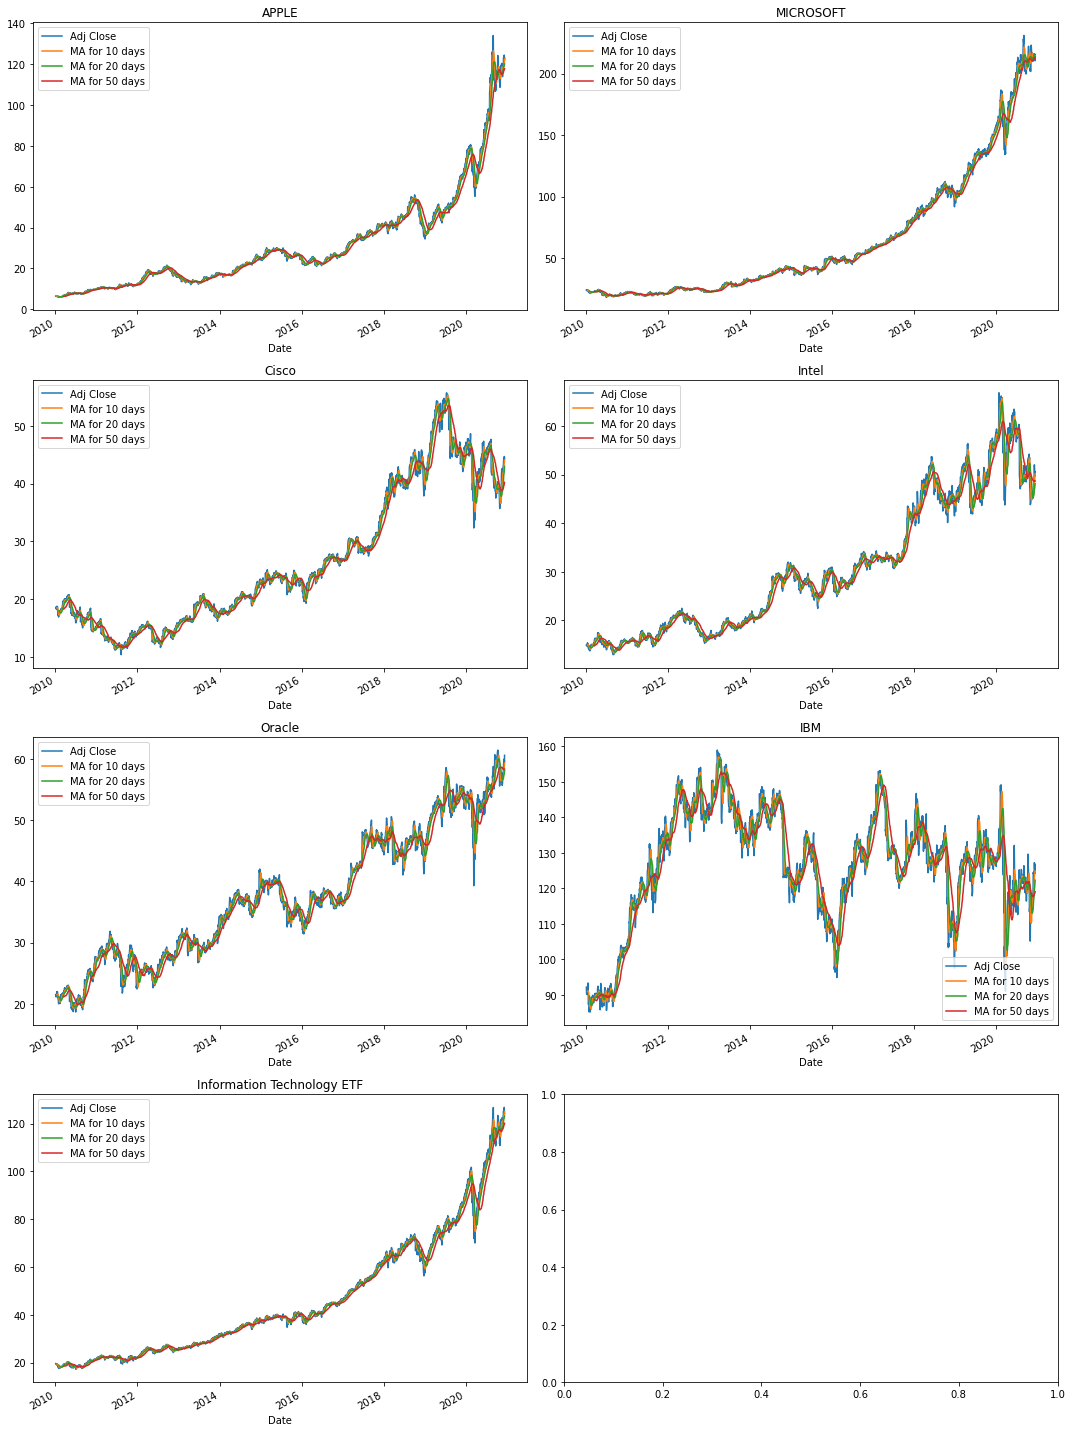

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MICROSOFT')

CSCO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Cisco')

INTC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Intel')

ORCL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Oracle')

IBM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('IBM')

XLK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Information Technology ETF')

fig.tight_layout()

#Apple and Microsoft look strong of course, cisco and intel are down *watch for news*.  Oracle looking good,
#IBM looks a mess

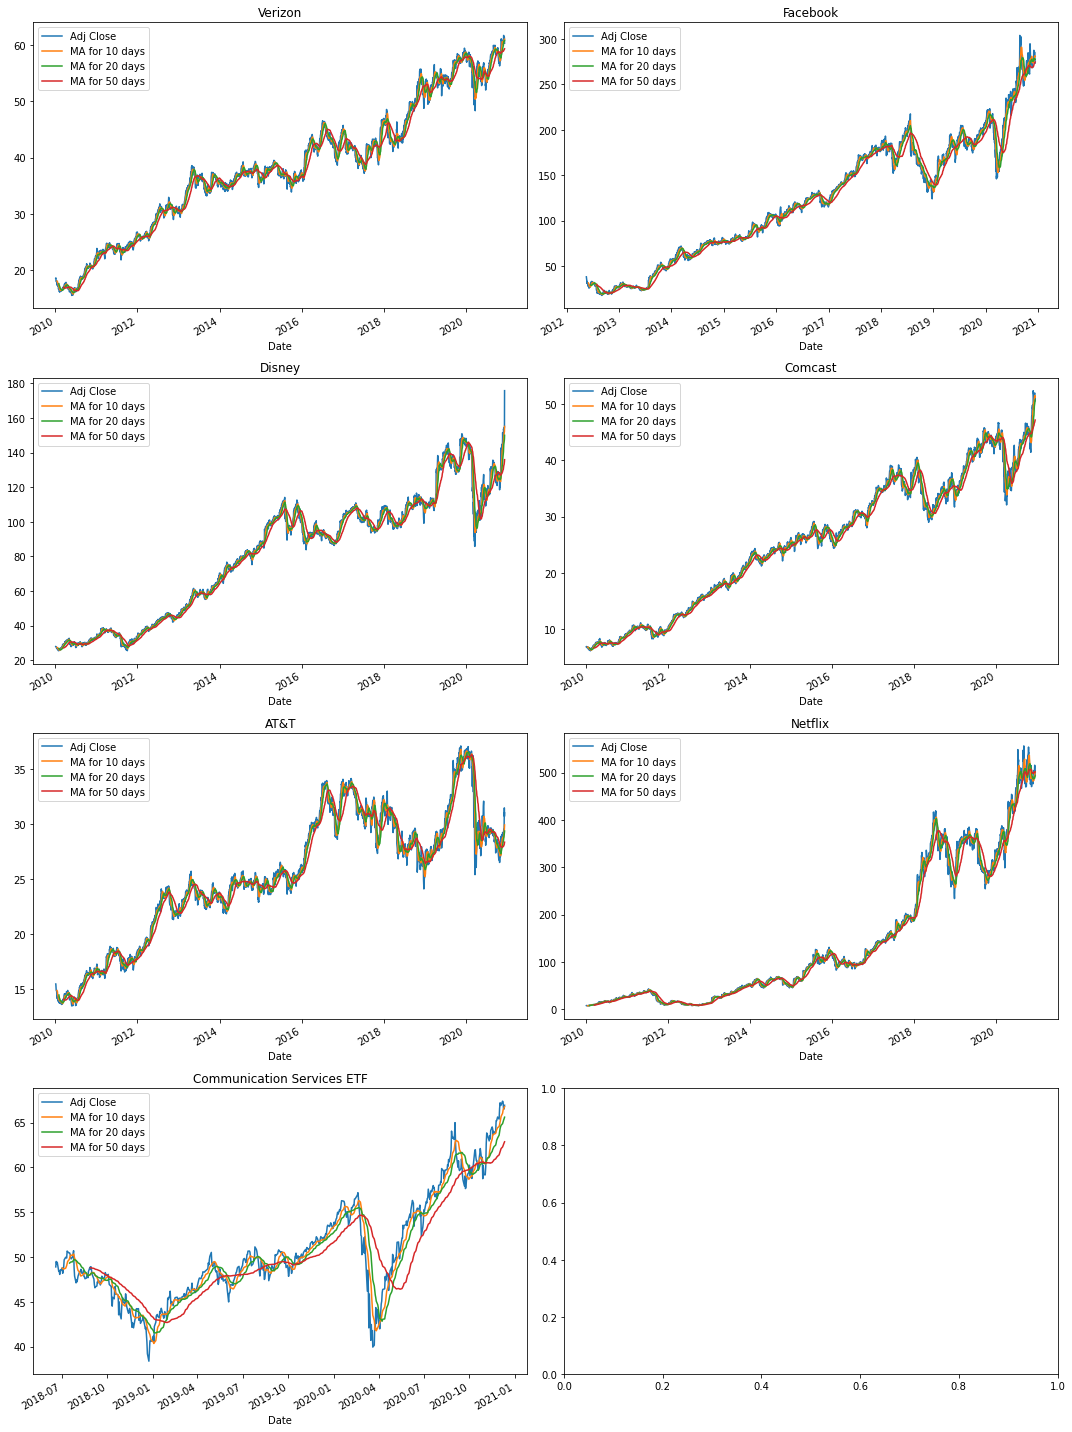

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

VZ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Verizon')

FB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Facebook')

DIS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Disney')

CMCSA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Comcast')

T[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('AT&T')

NFLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Netflix')

XLC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Communication Services ETF')

fig.tight_layout()

#Strong overall, Disney recently slipped but strongly recovered :O check into it*
#*check the code on CS ETF MA 50*

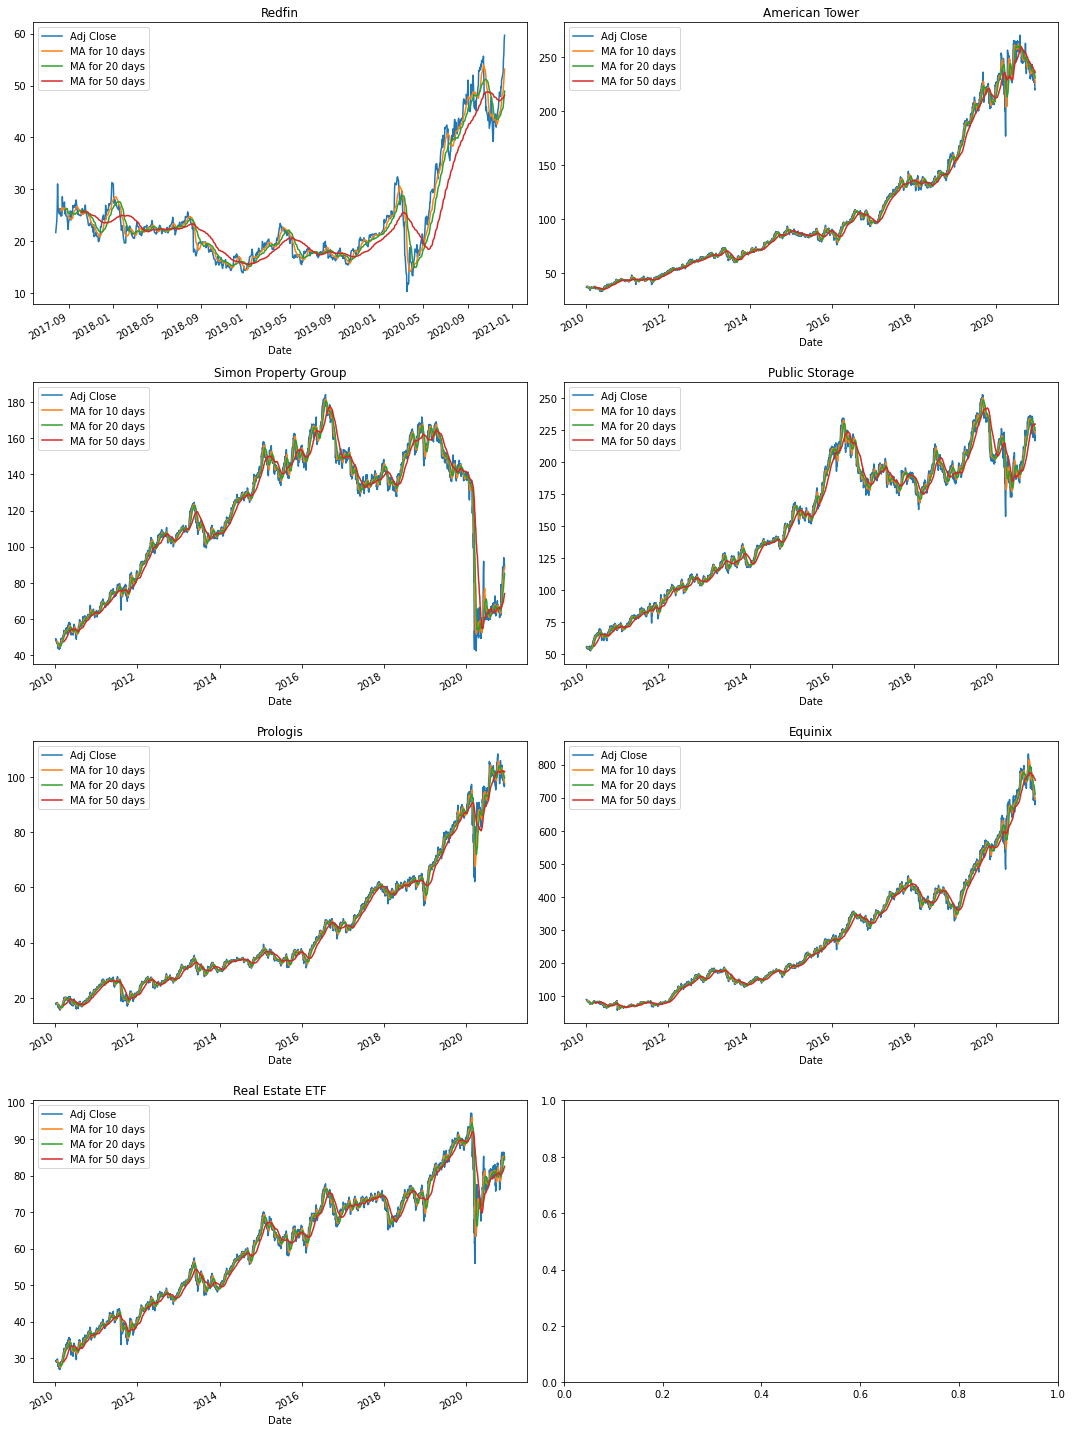

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

RDFN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Redfin')

AMT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('American Tower')

SPG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Simon Property Group')

PSA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Public Storage')

PLD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Prologis')

EQIX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Equinix')

VNQ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Real Estate ETF')

fig.tight_layout()

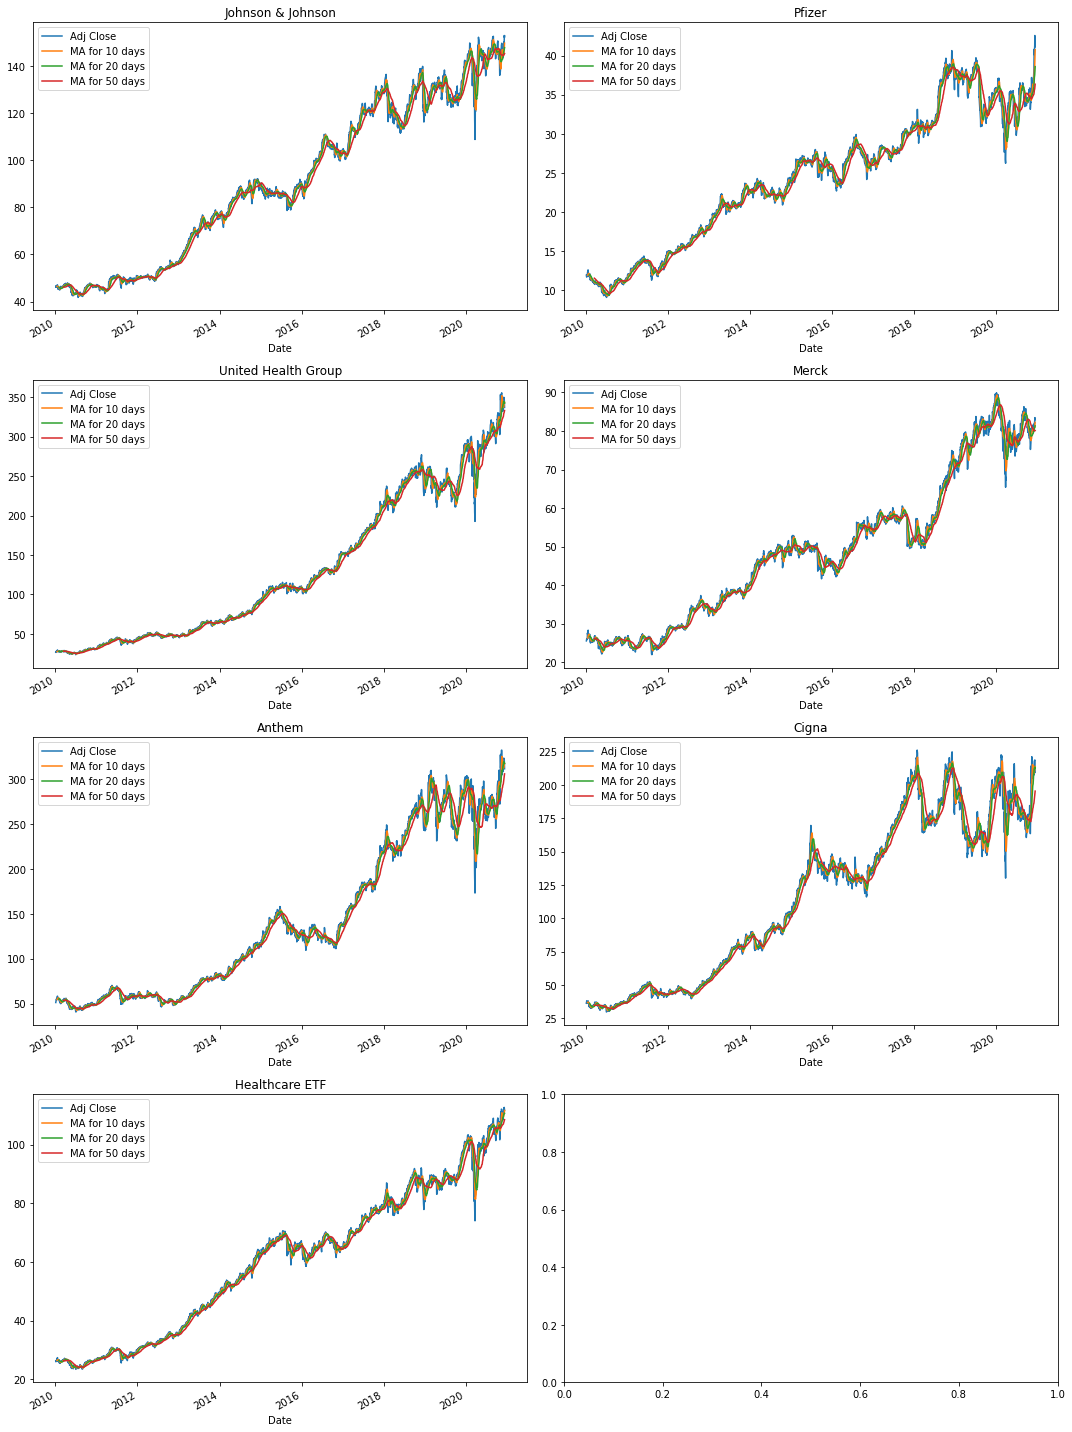

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

JNJ[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Johnson & Johnson')

PFE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Pfizer')

UNH[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('United Health Group')

MRK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Merck')

ANTM[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Anthem')

CI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Cigna')

XLV[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Healthcare ETF')

fig.tight_layout()

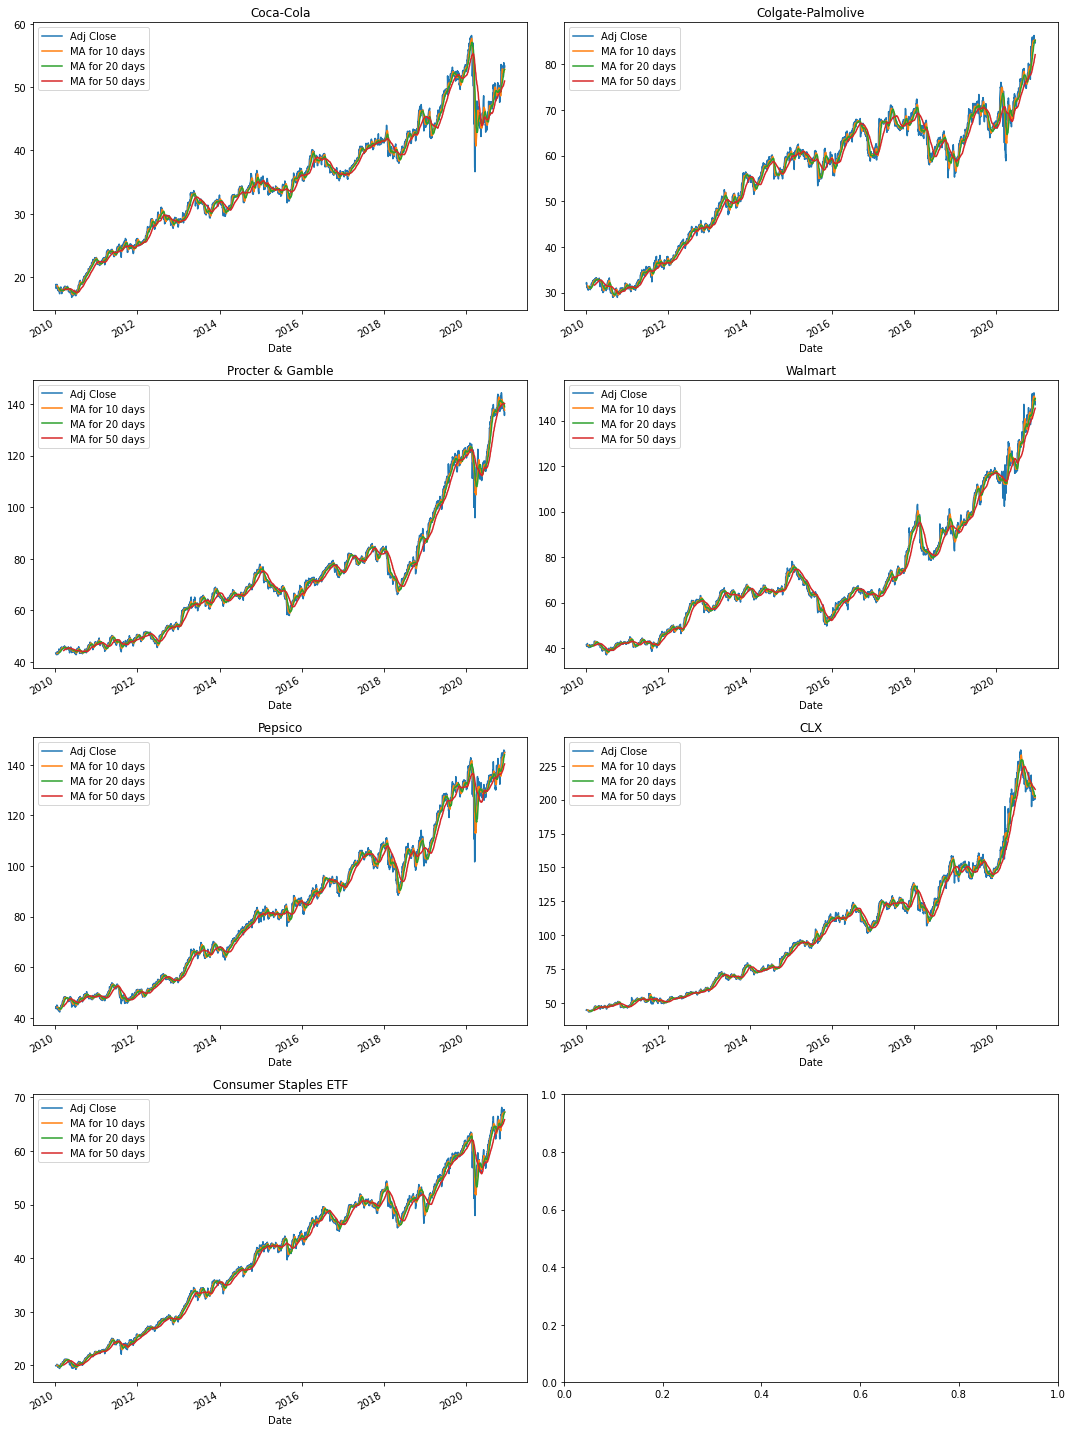

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

KO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Coca-Cola')

CL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Colgate-Palmolive')

PG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Procter & Gamble')

WMT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Walmart')

PEP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Pepsico')

CLX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('CLX')

XLP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Consumer Staples ETF')

fig.tight_layout()

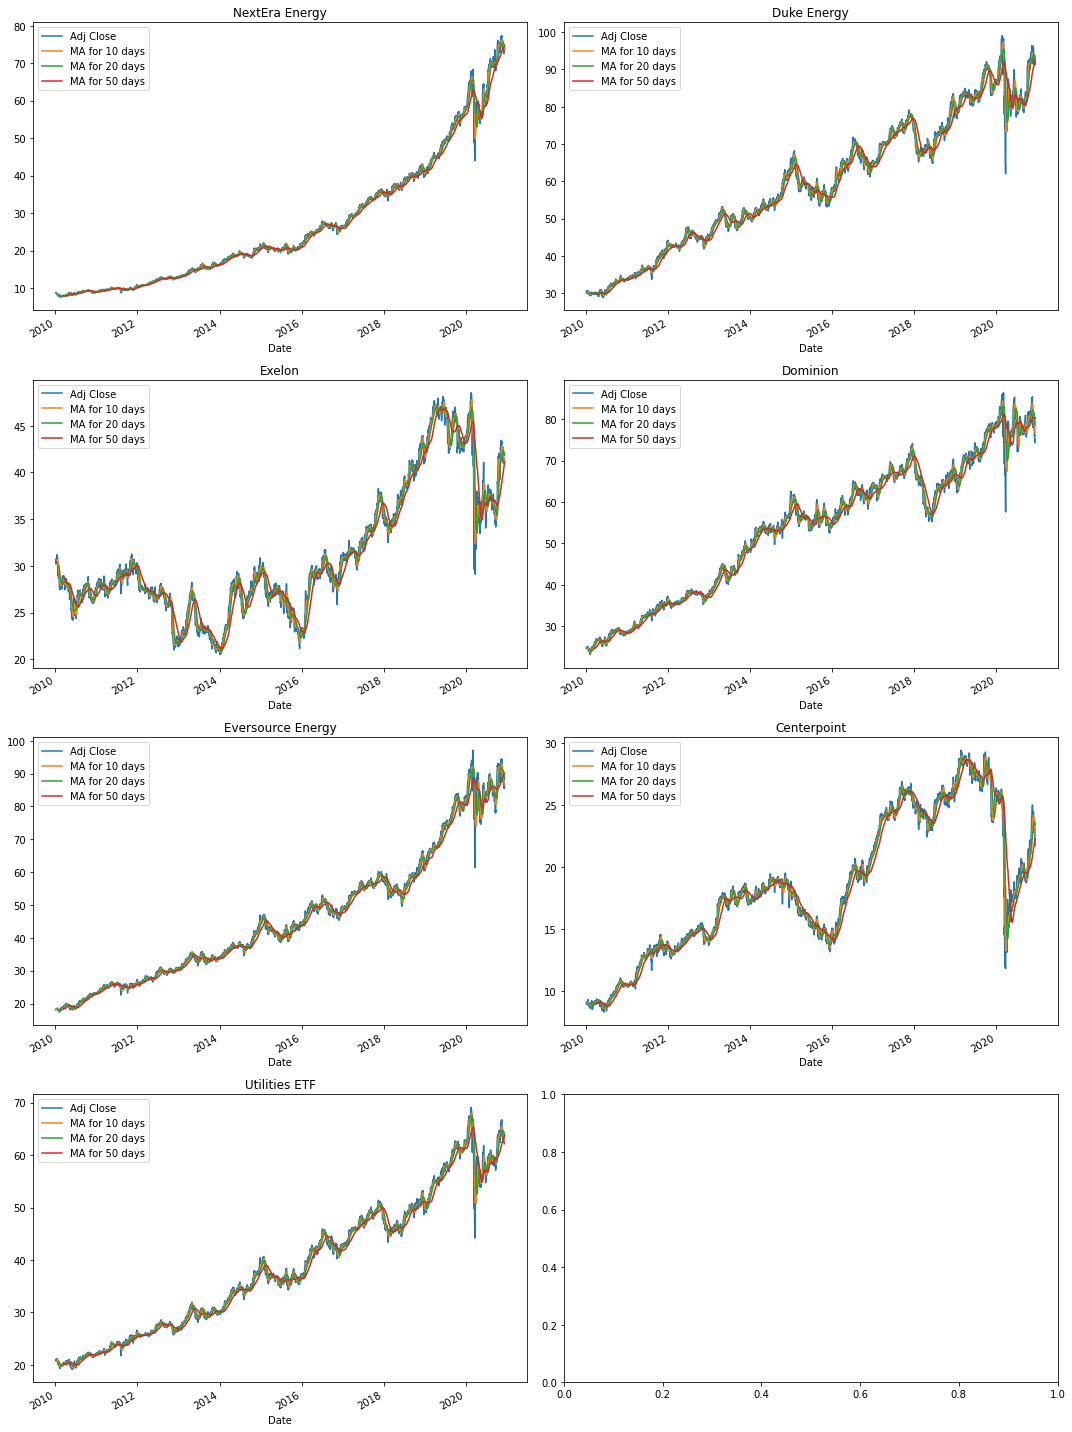

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

NEE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('NextEra Energy')

DUK[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Duke Energy')

EXC[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Exelon')

D[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Dominion')

ES[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('Eversource Energy')

CNP[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('Centerpoint')

XLU[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('Utilities ETF')

fig.tight_layout()

In [88]:
# Use pct_change to find the percent change for each day
for company in materials:
    company['Daily Return'] = company['Adj Close'].pct_change()

for company in industrials:
    company['Daily Return'] = company['Adj Close'].pct_change()

for company in financials:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in energy:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in consumer_discretionary:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in info_tech:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in communication:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in real_estate:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in health_care:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in consumer_staple:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in utilities:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in etf:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
for company in random:
    company['Daily Return'] = company['Adj Close'].pct_change()

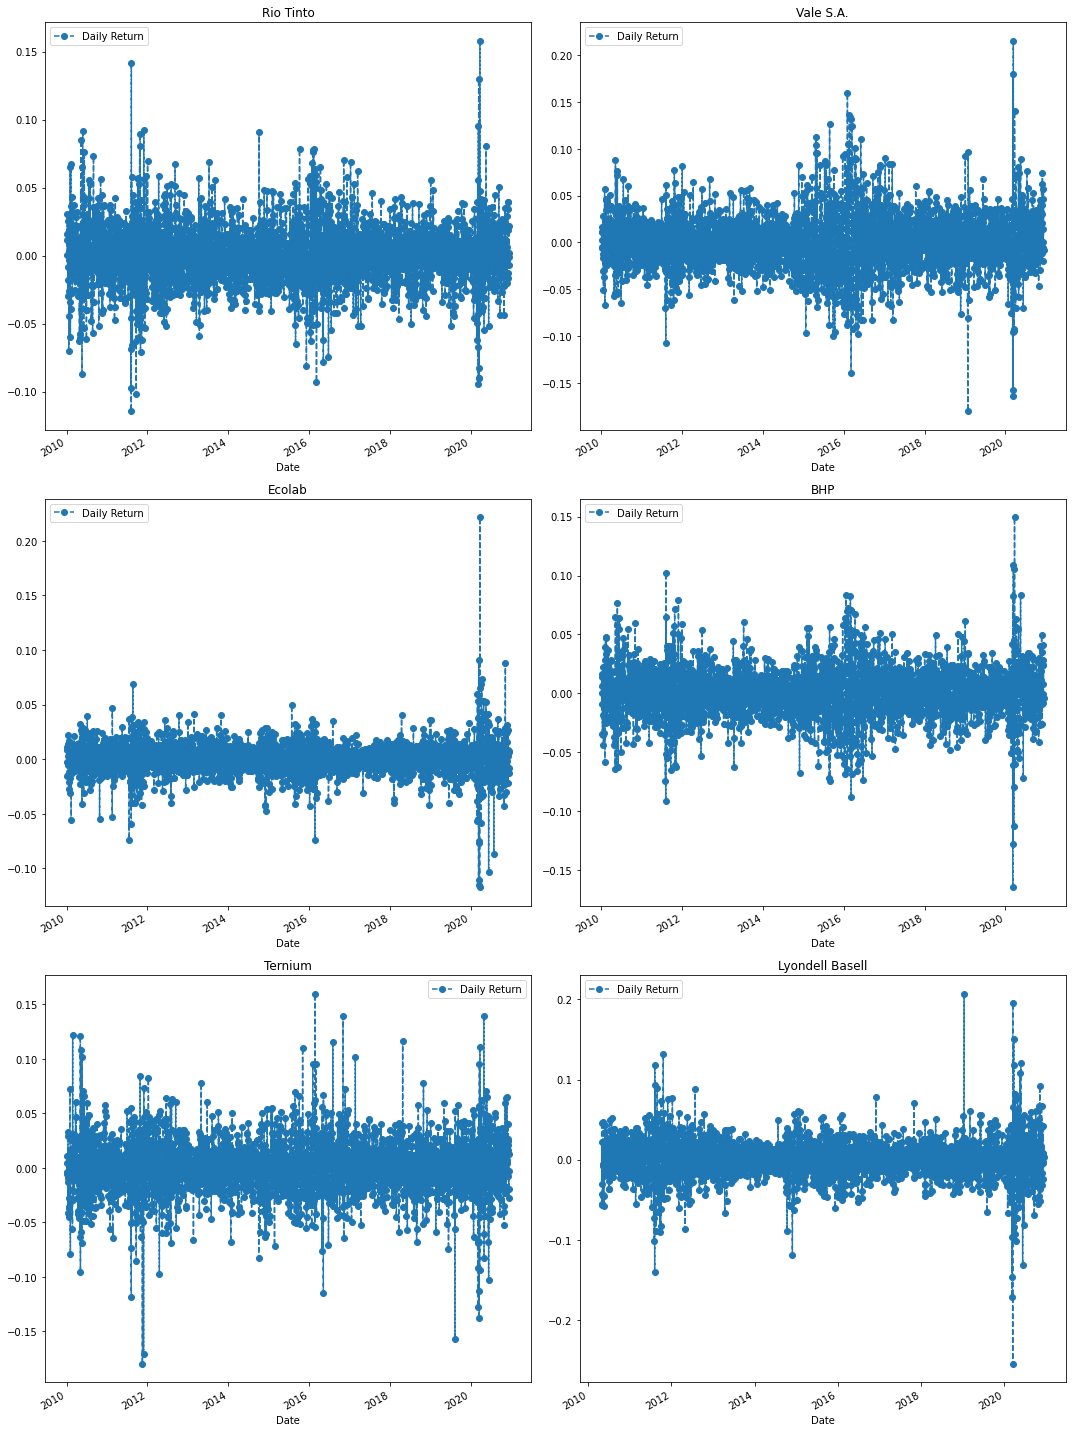

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

RIO['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Rio Tinto')

VALE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Vale S.A.')

ECL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Ecolab')

BHP['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BHP')

TX['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Ternium')

LYB['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Lyondell Basell')

fig.tight_layout()

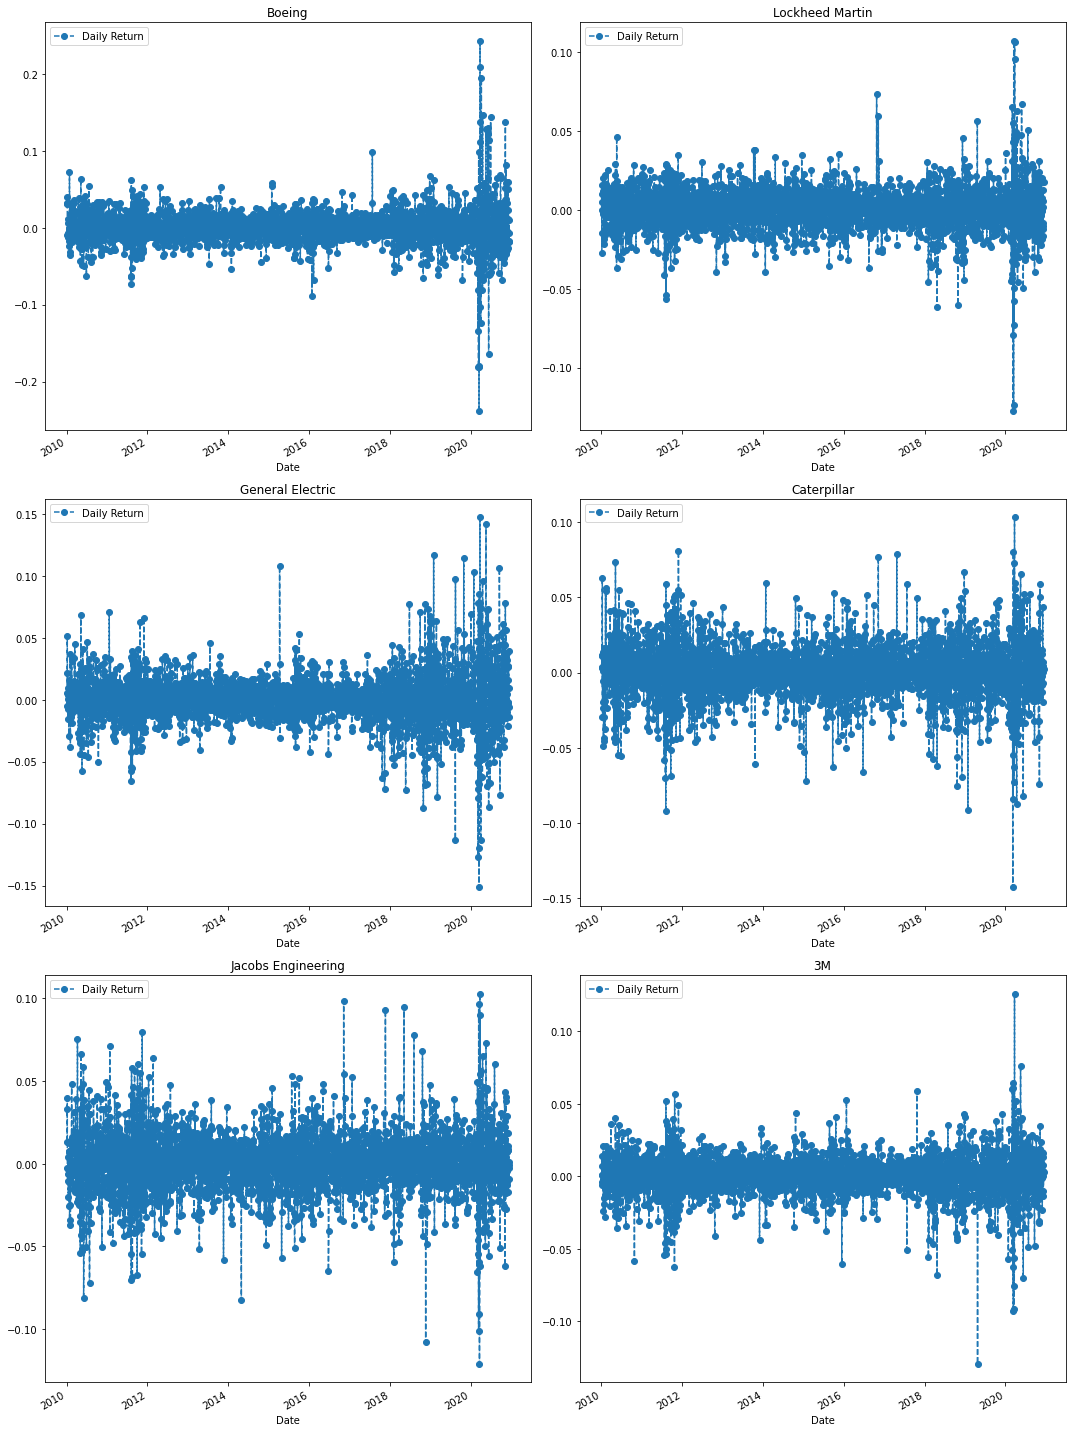

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

BA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Boeing')

LMT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Lockheed Martin')

GE['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('General Electric')

CAT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Caterpillar')

J['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Jacobs Engineering')

MMM['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('3M')

fig.tight_layout()

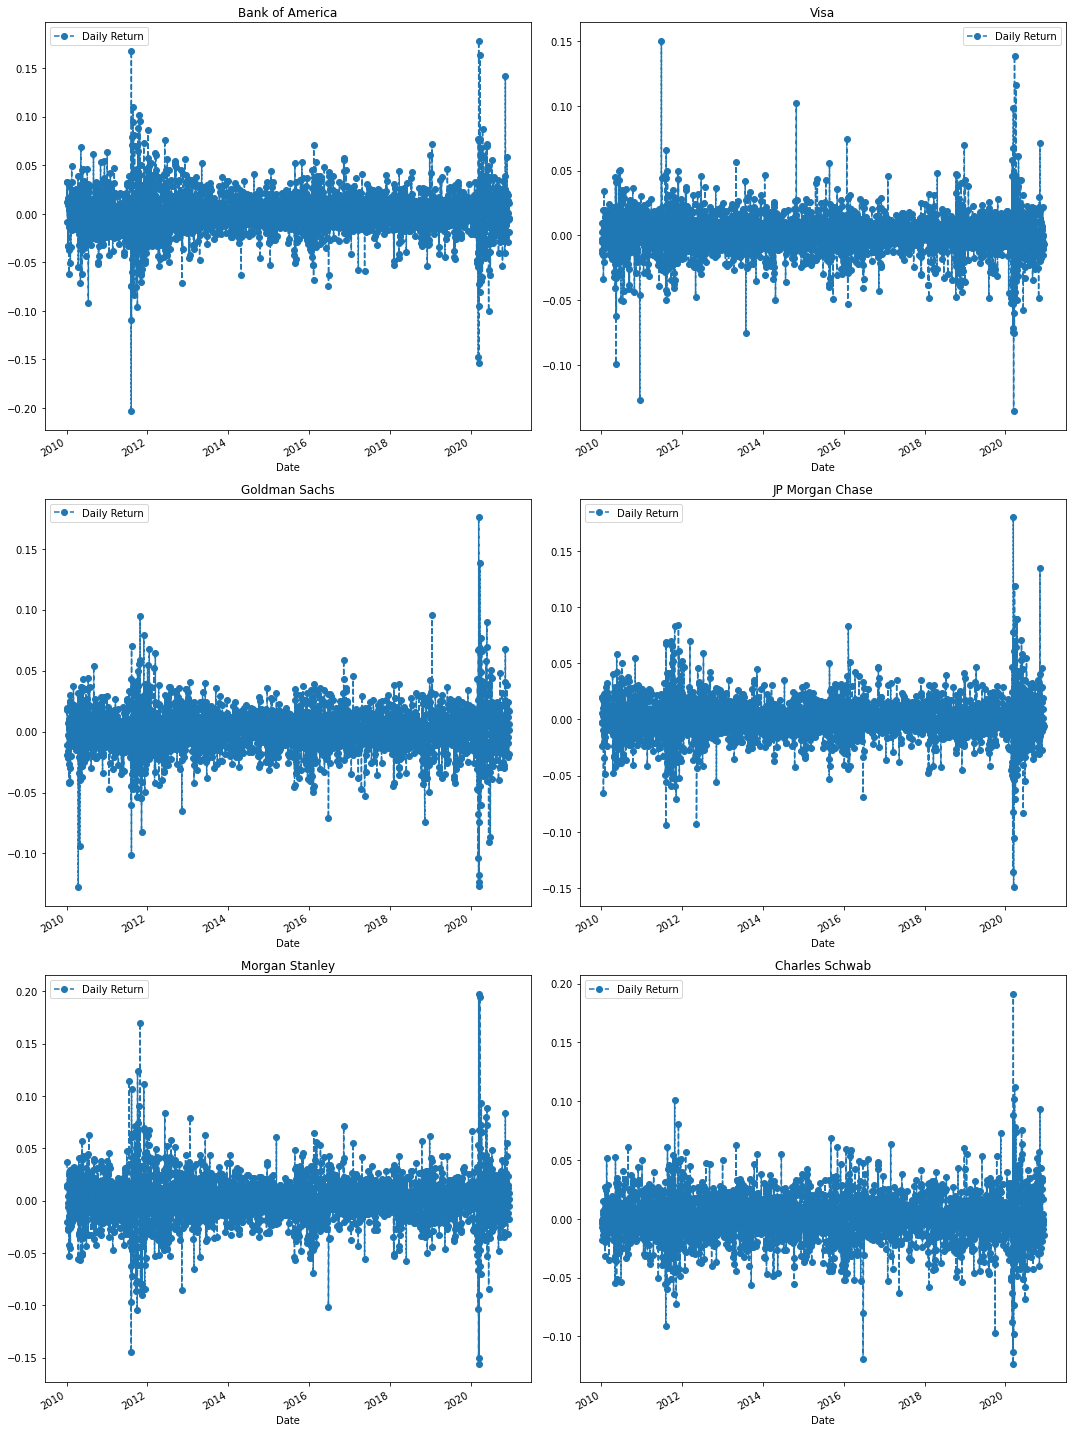

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

BAC['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Bank of America')

V['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Visa')

GS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Goldman Sachs')

JPM['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('JP Morgan Chase')

MS['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Morgan Stanley')

SCHW['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Charles Schwab')

fig.tight_layout()

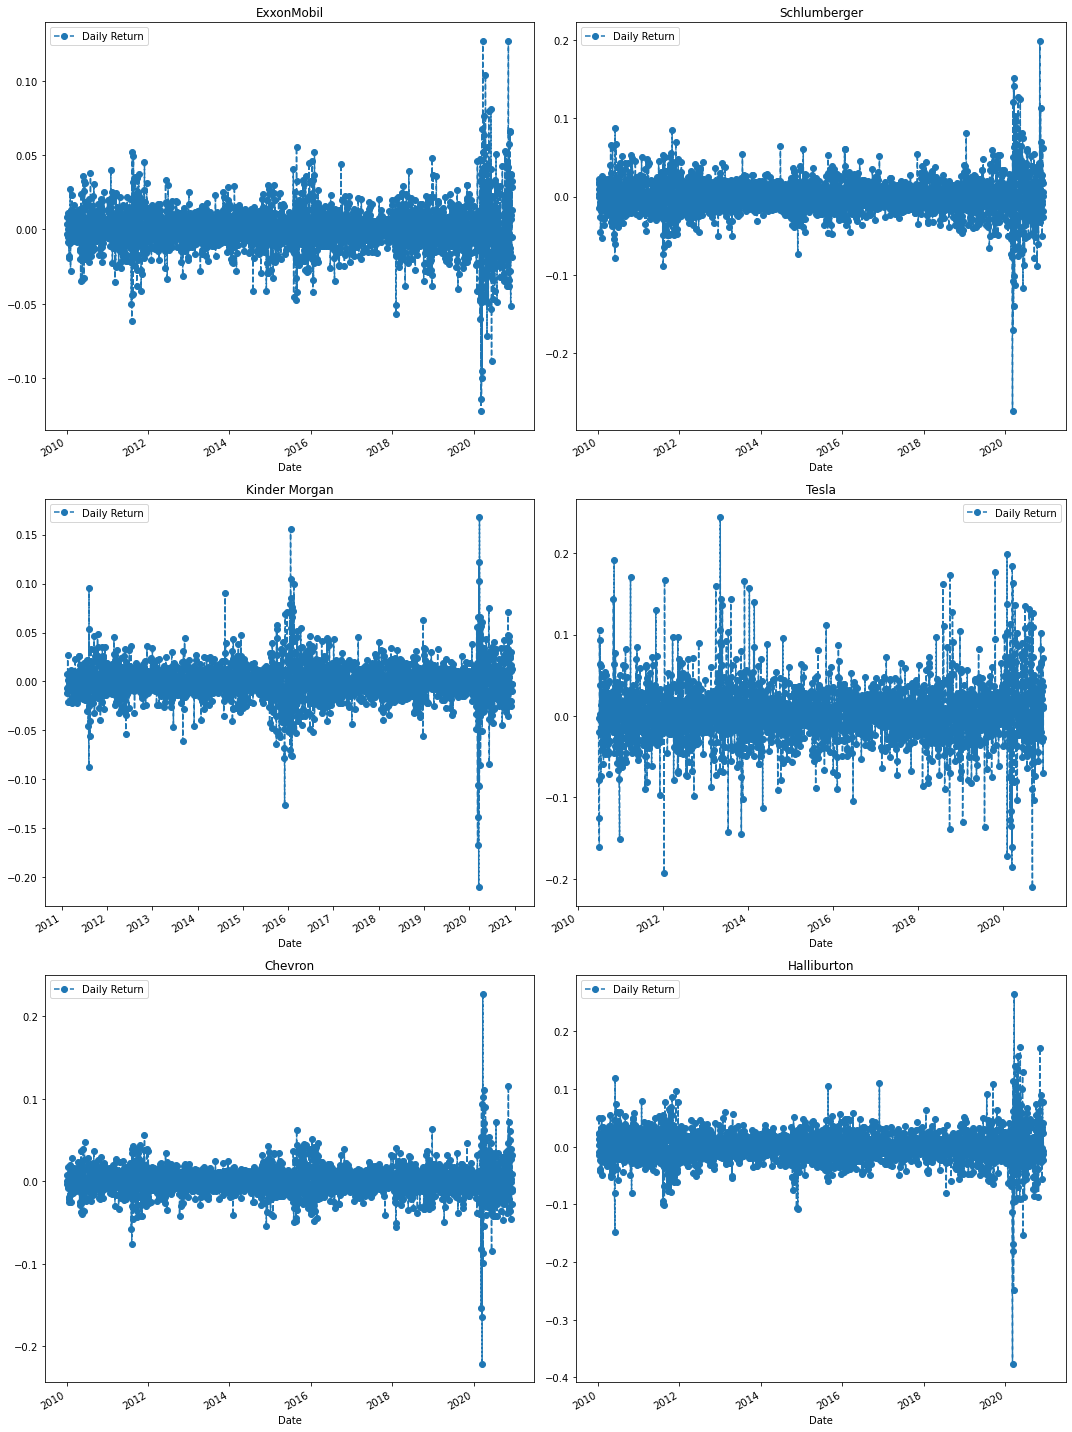

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

XOM['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('ExxonMobil')

SLB['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Schlumberger')

KMI['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Kinder Morgan')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Tesla')

CVX['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Chevron')

HAL['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Halliburton')

fig.tight_layout()

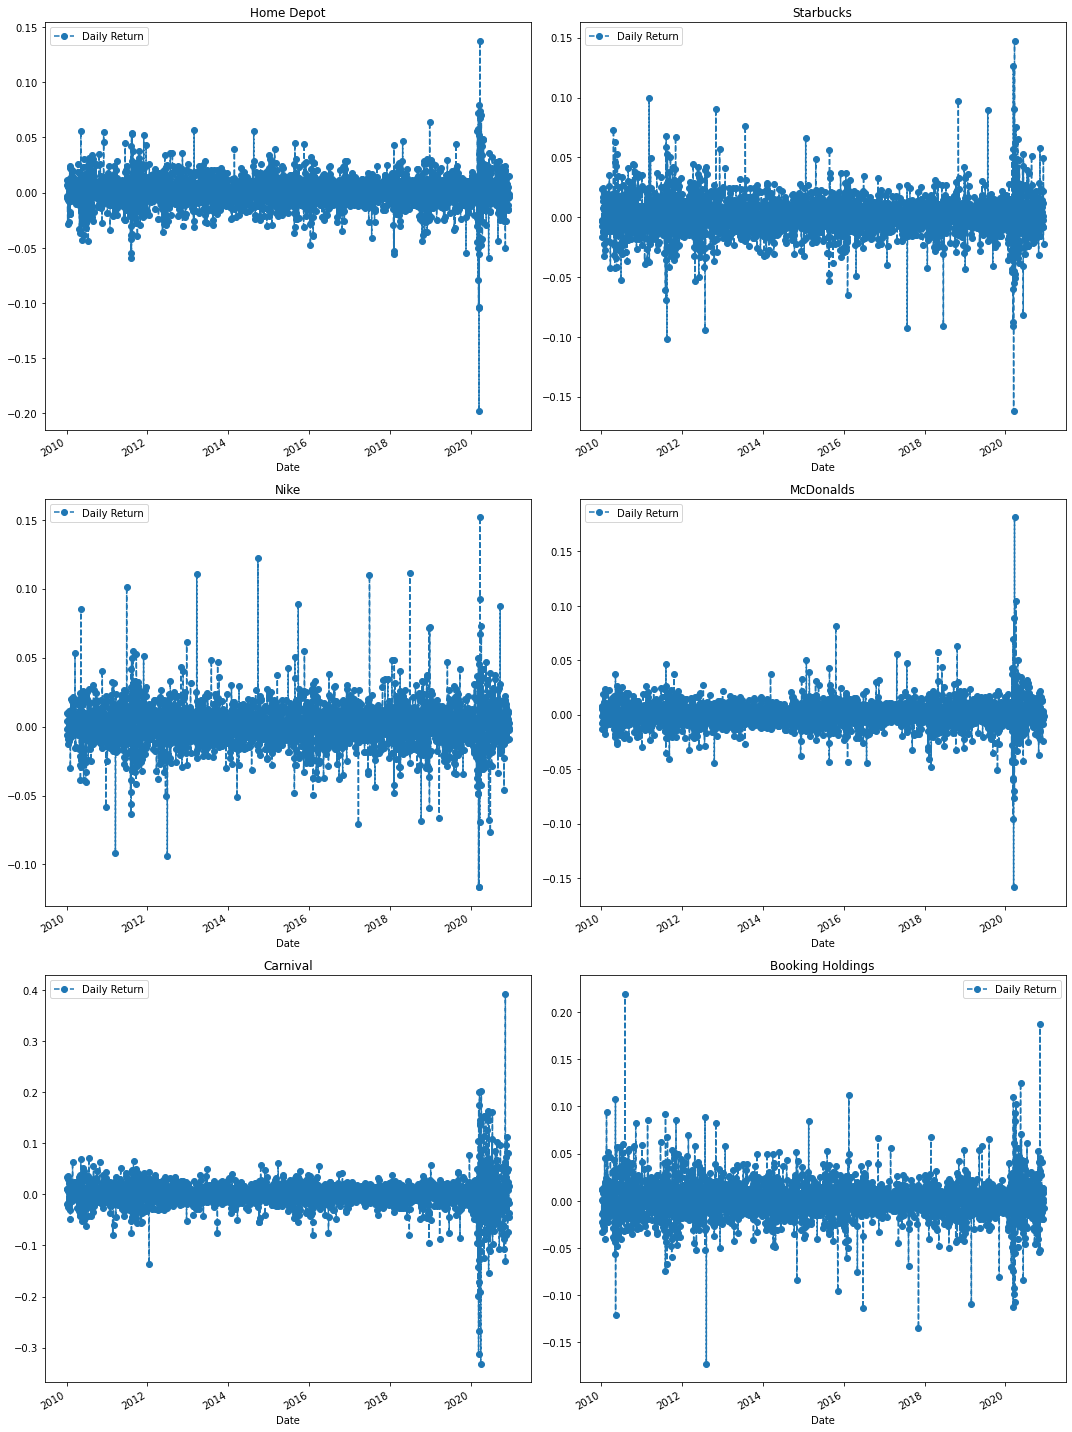

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

HD['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Home Depot')

SBUX['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Starbucks')

NKE['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Nike')

MCD['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('McDonalds')

CCL['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Carnival')

BKNG['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Booking Holdings')

fig.tight_layout()

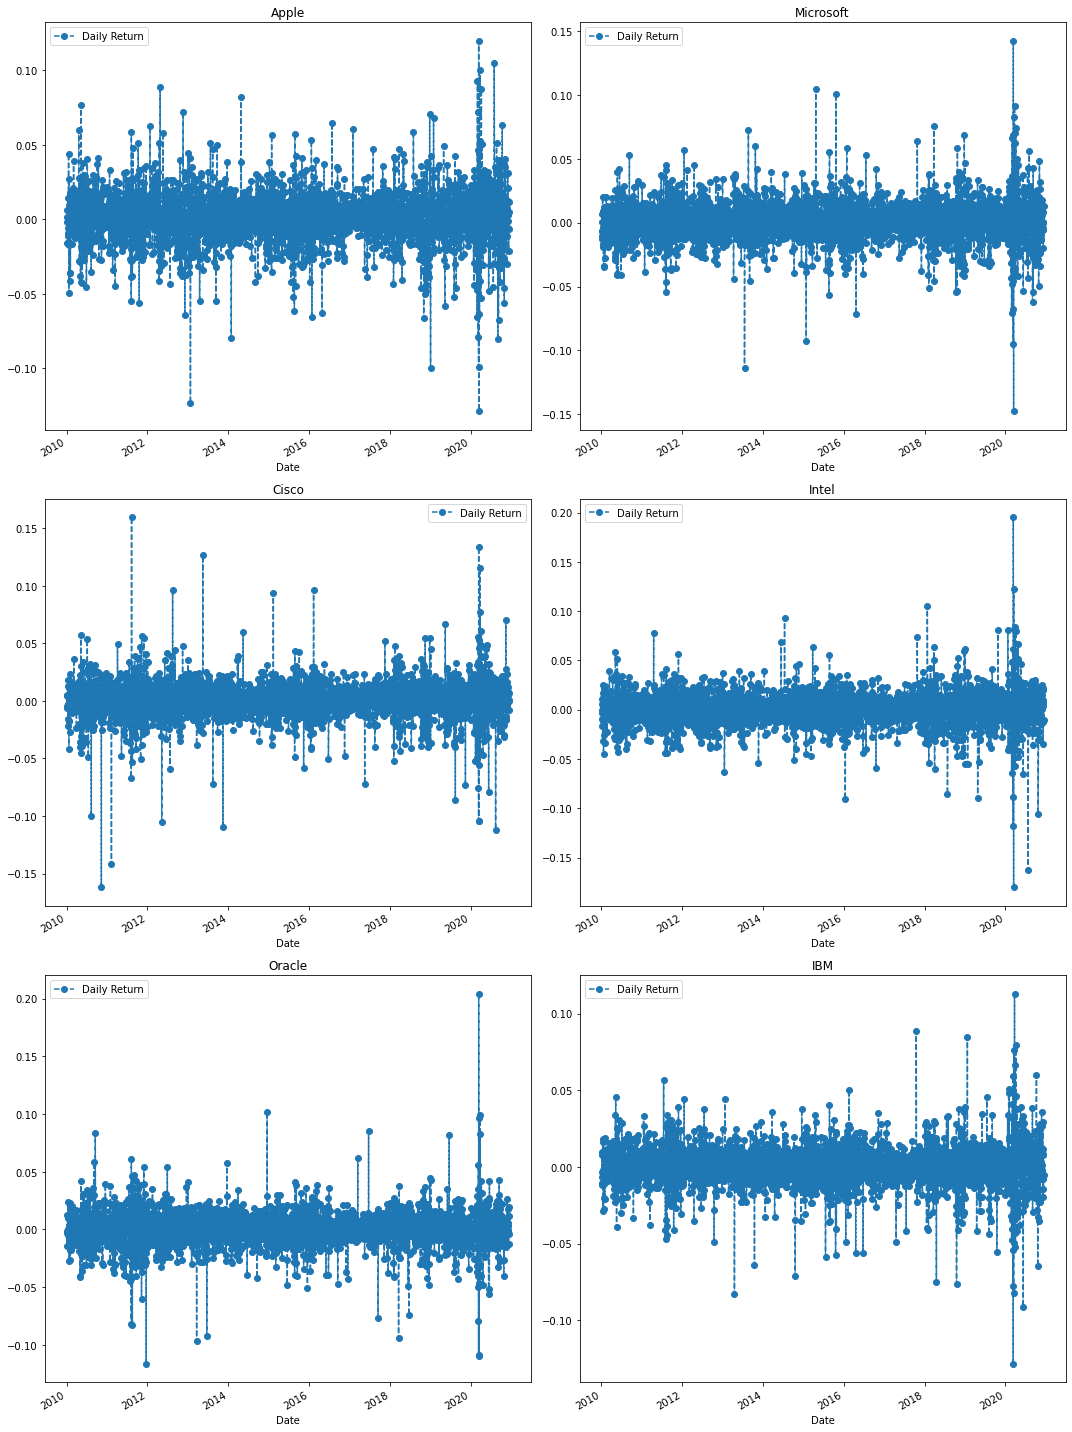

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Apple')

MSFT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Microsoft')

CSCO['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Cisco')

INTC['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Intel')

ORCL['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Oracle')

IBM['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('IBM')

fig.tight_layout()

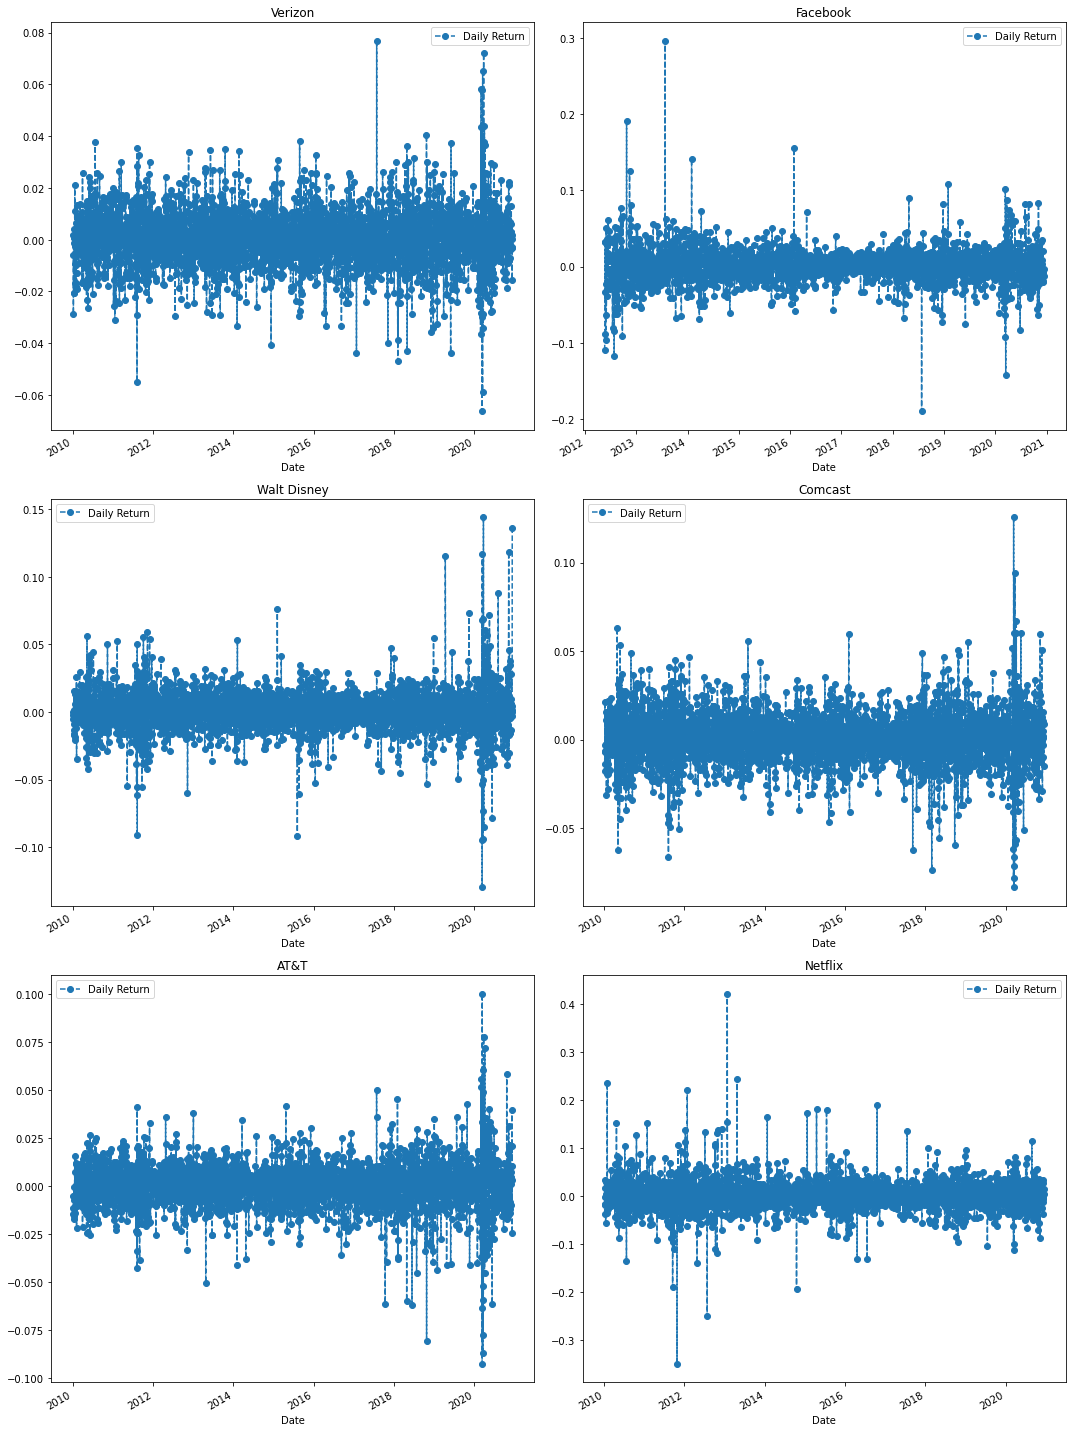

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

VZ['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Verizon')

FB['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Facebook')

DIS['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Walt Disney')

CMCSA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Comcast')

T['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('AT&T')

NFLX['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Netflix')

fig.tight_layout()

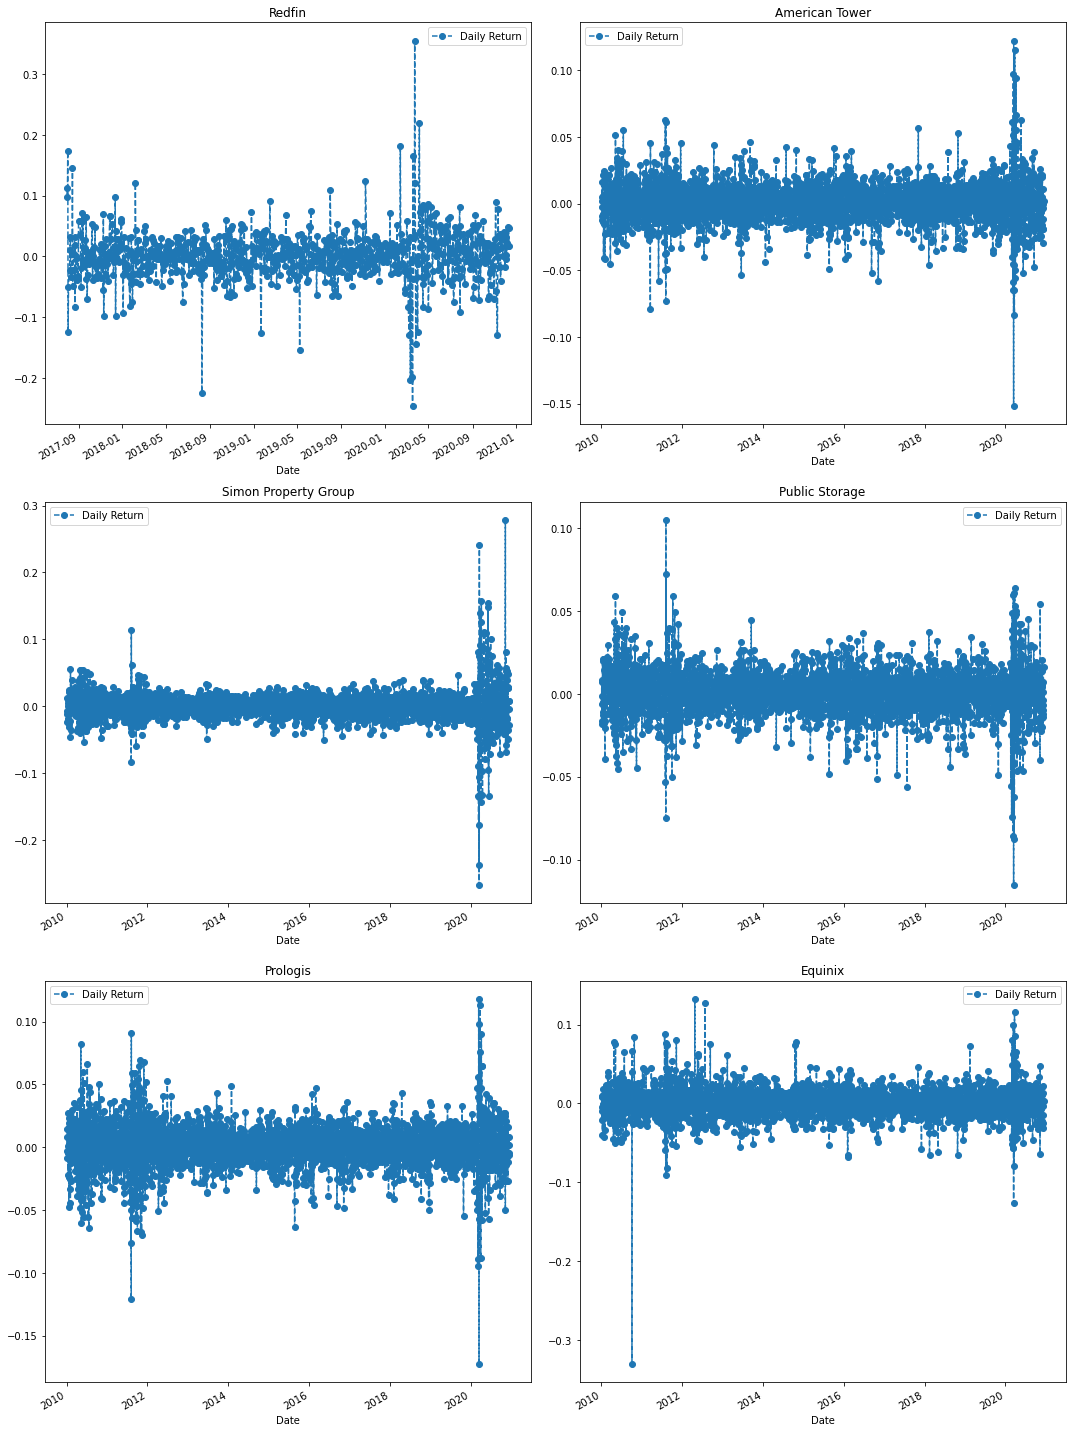

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

RDFN['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Redfin')

AMT['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('American Tower')

SPG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Simon Property Group')

PSA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Public Storage')

PLD['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Prologis')

EQIX['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Equinix')

fig.tight_layout()

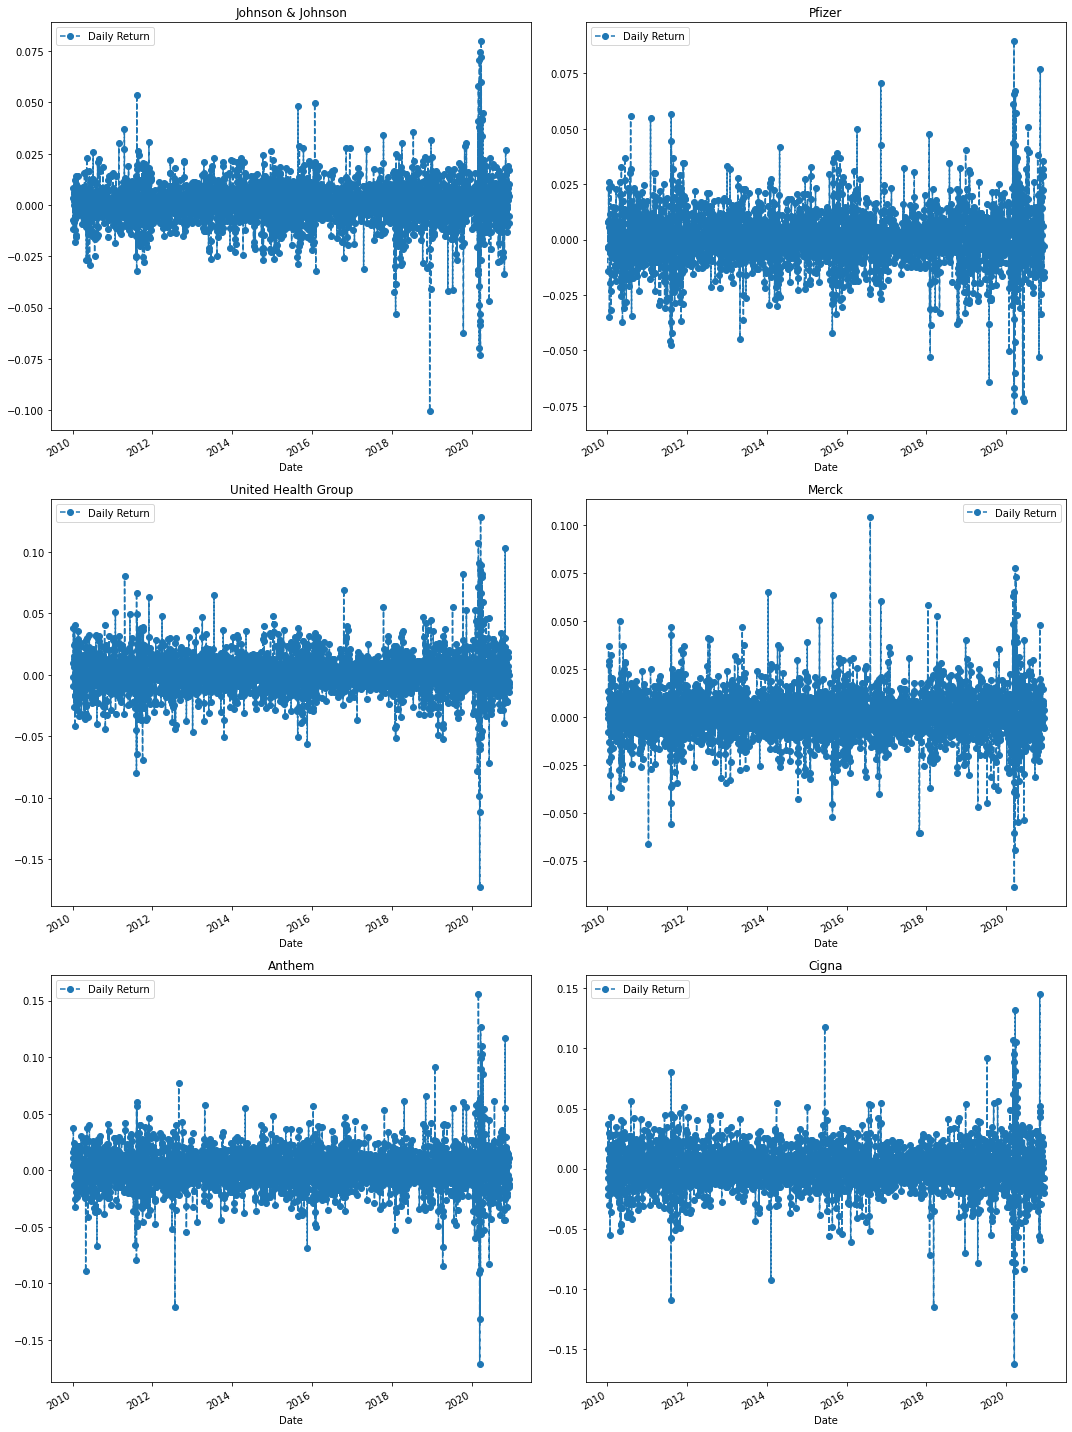

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

JNJ['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Johnson & Johnson')

PFE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Pfizer')

UNH['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('United Health Group')

MRK['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Merck')

ANTM['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Anthem')

CI['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Cigna')

fig.tight_layout()

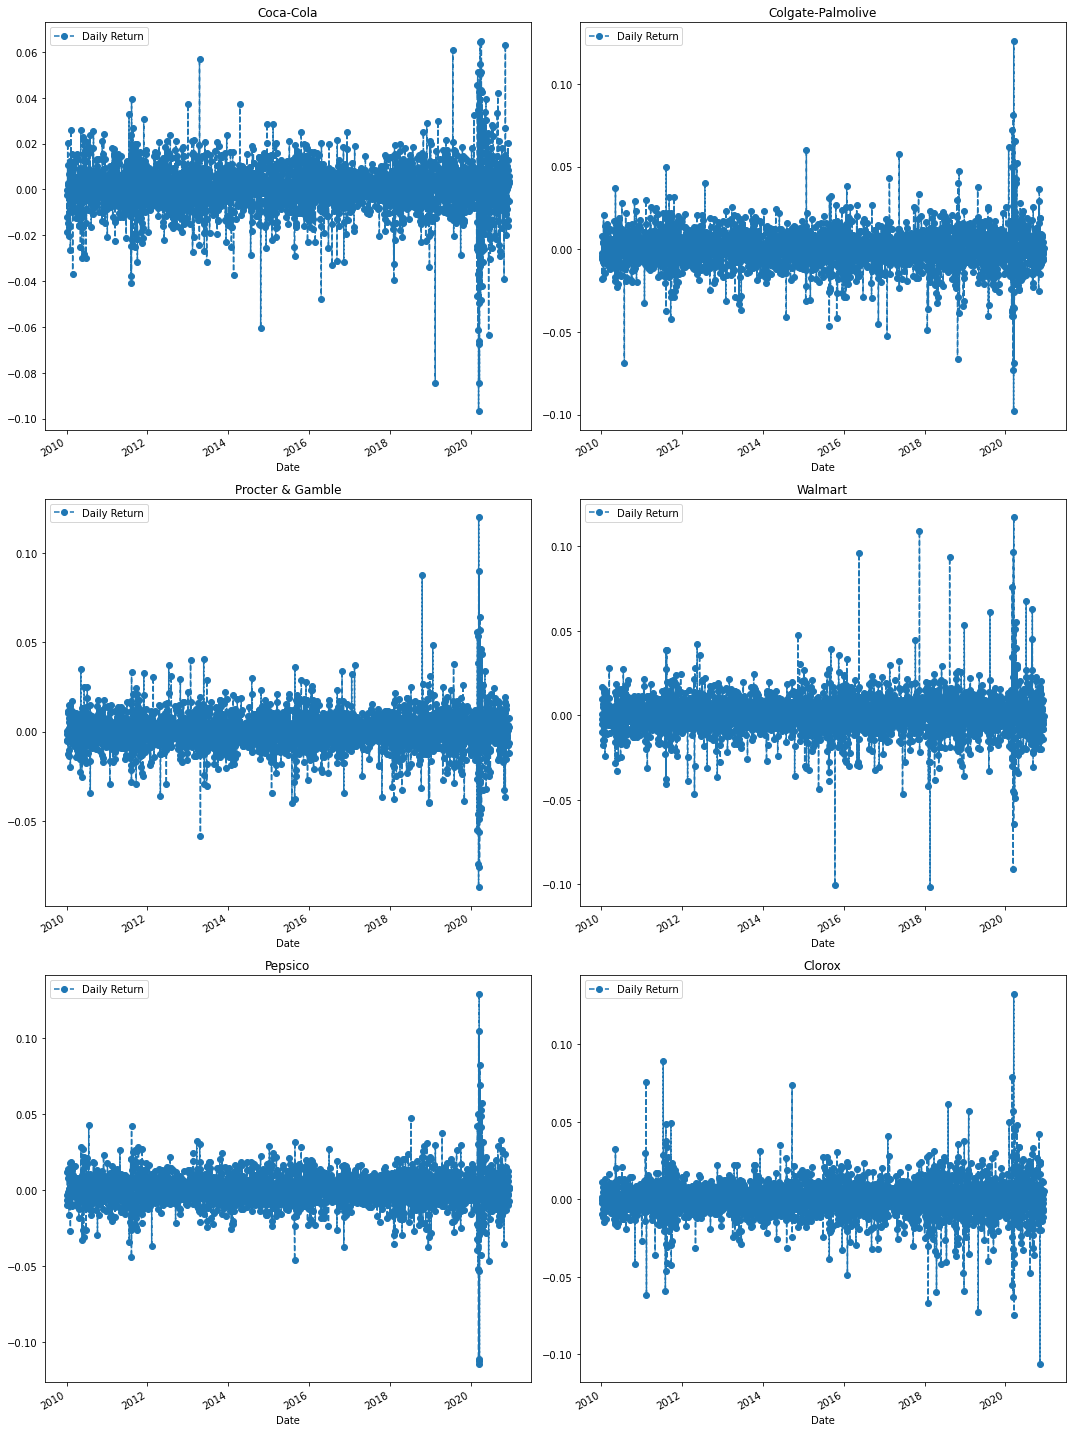

In [27]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

KO['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Coca-Cola')

CL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Colgate-Palmolive')

PG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Procter & Gamble')

WMT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Walmart')

PEP['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Pepsico')

CLX['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('Clorox')

fig.tight_layout()

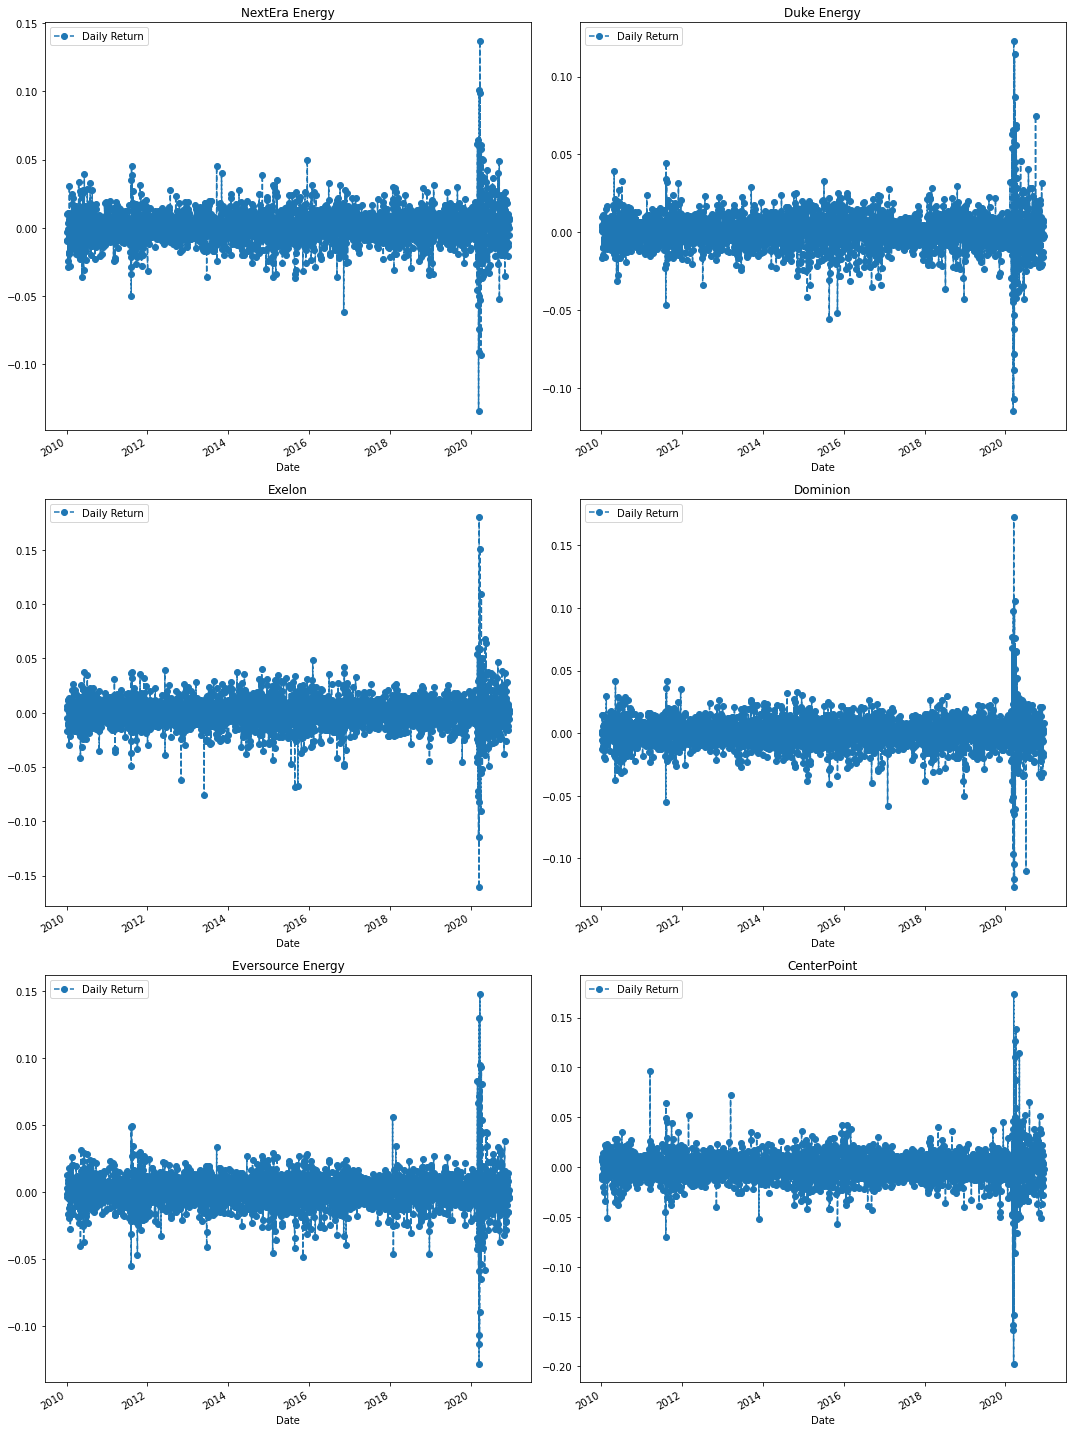

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(15)

NEE['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NextEra Energy')

DUK['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Duke Energy')

EXC['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Exelon')

D['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Dominion')

ES['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('Eversource Energy')

CNP['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('CenterPoint')

fig.tight_layout()

In [29]:
# Relative Strength Index
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)

In [30]:
etf_rets=pd.DataFrame()
etf_rets['XLB']=XLB['Daily Return']
etf_rets['XLI']=XLI['Daily Return']
etf_rets['XLF']=XLF['Daily Return']
etf_rets['XLE']=XLE['Daily Return']
etf_rets['XLY']=XLY['Daily Return']
etf_rets['XLK']=XLK['Daily Return']
etf_rets['XLC']=XLC['Daily Return']
etf_rets['VNQ']=VNQ['Daily Return']
etf_rets['XLV']=XLV['Daily Return']
etf_rets['XLP']=XLP['Daily Return']
etf_rets['XLU']=XLU['Daily Return']
etf_rets.reset_index()

etf_rets.tail()

XLB       XLI       XLF       XLE       XLY       XLK  \
Date                                                                     
2020-12-07 -0.006548 -0.004820 -0.006901 -0.023382 -0.002278  0.002856   
2020-12-08  0.005609  0.004843 -0.000347  0.014869 -0.002093  0.003244   
2020-12-09  0.000558  0.002242 -0.002433  0.002235 -0.000953 -0.019163   
2020-12-10 -0.006132 -0.009507  0.001742  0.030723 -0.000891  0.001447   
2020-12-11 -0.005749  0.002371 -0.010087 -0.011538 -0.004776 -0.002087   

                 XLC       VNQ       XLV       XLP       XLU  
Date                                                          
2020-12-07  0.006271 -0.008679 -0.006131 -0.003844  0.005608  
2020-12-08 -0.001484 -0.003502  0.007599  0.005492 -0.003027  
2020-12-09 -0.011887 -0.006208 -0.003461 -0.003986 -0.001758  
2020-12-10  0.000602 -0.004361 -0.001692 -0.004446 -0.005123  
2020-12-11  0.006011 -0.000947 -0.003924  0.002233  0.001609

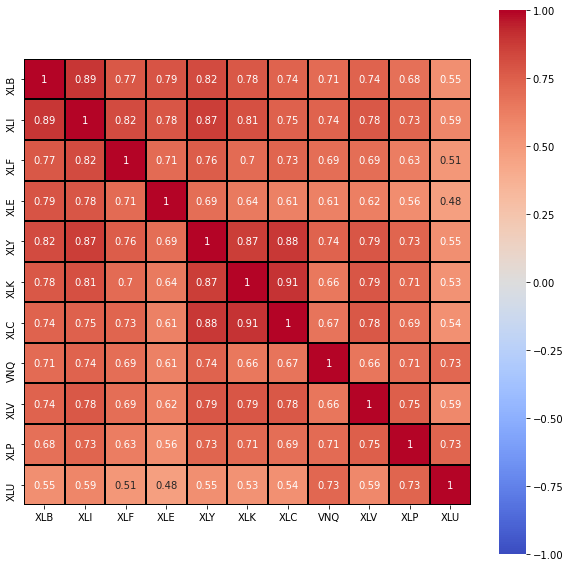

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(etf_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

#Information Technology and Communication services have the strongest correlation(0.91). 
#Materials/Industrials(0.89), Industrials/Consumer Discretionary(0.87), Consumer Discretionary/
#Information Technology(0.87), Consumer Discretionary/Communication services(0.88) are also strong

In [32]:
material_rets=pd.DataFrame()
material_rets['RIO']=RIO['Daily Return']
material_rets['VALE']=VALE['Daily Return']
material_rets['ECL']=ECL['Daily Return']
material_rets['BHP']=BHP['Daily Return']
material_rets['TX']=TX['Daily Return']
material_rets['LYB']=LYB['Daily Return']
material_rets['XLB']=XLB['Daily Return']

material_rets.reset_index()

Date       RIO      VALE       ECL       BHP        TX       LYB  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.015617  0.010578 -0.015249  0.000126  0.010782       NaN   
2    2010-01-06  0.030491  0.016029 -0.002917  0.016461 -0.004267       NaN   
3    2010-01-07  0.000170  0.002898  0.010803 -0.008777 -0.005892       NaN   
4    2010-01-08  0.011126  0.010594  0.008462  0.013719  0.004310       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.012852  0.014330 -0.012721 -0.008405  0.026738 -0.024087   
2752 2020-12-08 -0.001096 -0.005528  0.007498  0.007676  0.012370  0.008954   
2753 2020-12-09 -0.006860 -0.006177  0.006640 -0.000317 -0.027331  0.007396   
2754 2020-12-10  0.021964  0.056557 -0.012483  0.027941 -0.002645 -0.003727   
2755 2020-12-11  0.001892 -0.008235 -0.008203 -0.003552 -0.019224  0.003288   

           XLB  
0          NaN  
1     0.003233  
2     0.016994  
3    -0.007779  
4     0.013937  
...        ...  
2751 -0.006548  
2752  0.005609  
2753  0.000558  
2754 -0.006132  
2755 -0.005749  

[2756 rows x 8 columns]

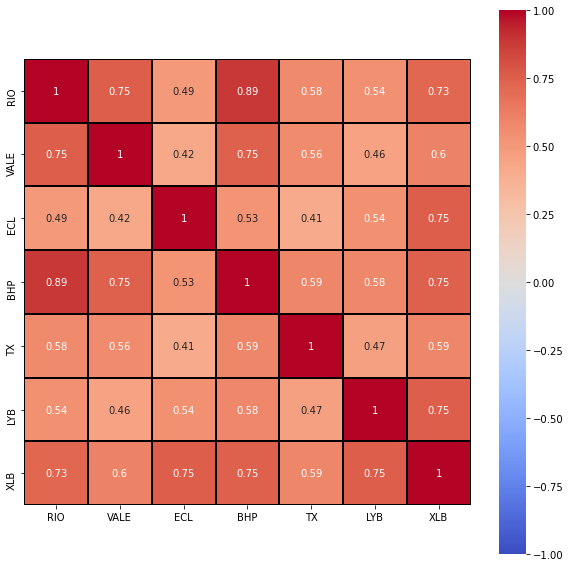

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(material_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [34]:
industrial_rets=pd.DataFrame()
industrial_rets['BA']=BA['Daily Return']
industrial_rets['LMT']=LMT['Daily Return']
industrial_rets['GE']=GE['Daily Return']
industrial_rets['CAT']=CAT['Daily Return']
industrial_rets['J']=J['Daily Return']
industrial_rets['MMM']=MMM['Daily Return']
industrial_rets['XLI']=XLI['Daily Return']

industrial_rets.reset_index()

Date        BA       LMT        GE       CAT         J       MMM  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.032752  0.010410  0.005178  0.011956  0.013264 -0.006264   
2    2010-01-06  0.030335 -0.014681 -0.005152  0.003038  0.033111  0.014182   
3    2010-01-07  0.040482 -0.027448  0.051780  0.004039  0.039503  0.000717   
4    2010-01-08 -0.009646  0.016127  0.021538  0.011228 -0.002390  0.007047   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07  0.023463 -0.012220 -0.001838 -0.019209  0.008168 -0.013394   
2752 2020-12-08 -0.006718 -0.008008  0.009208  0.000727 -0.002276  0.013576   
2753 2020-12-09 -0.019064  0.005901  0.039234  0.006878  0.000912  0.016410   
2754 2020-12-10  0.010213 -0.016494 -0.006146 -0.006775 -0.009025 -0.010269   
2755 2020-12-11 -0.017489  0.017783 -0.014134  0.002460 -0.000552  0.003055   

           XLI  
0          NaN  
1     0.003531  
2     0.002111  
3     0.010885  
4     0.015978  
...        ...  
2751 -0.004820  
2752  0.004843  
2753  0.002242  
2754 -0.009507  
2755  0.002371  

[2756 rows x 8 columns]

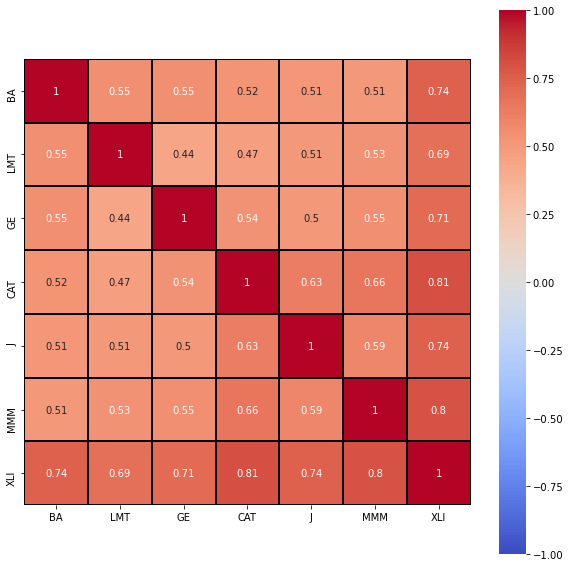

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(industrial_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [36]:
financial_rets=pd.DataFrame()
financial_rets['BAC']=BAC['Daily Return']
financial_rets['V']=V['Daily Return']
financial_rets['GS']=GS['Daily Return']
financial_rets['JPM']=JPM['Daily Return']
financial_rets['MS']=MS['Daily Return']
financial_rets['SCHW']=SCHW['Daily Return']
financial_rets['XLF']=XLF['Daily Return']

financial_rets.reset_index()

Date       BAC         V        GS       JPM        MS      SCHW  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.032505 -0.011459  0.017679  0.019370  0.036558 -0.003033   
2    2010-01-06  0.011729 -0.013428 -0.010674  0.005494  0.012797 -0.018255   
3    2010-01-07  0.032947  0.009307  0.019569  0.019809  0.014484 -0.003616   
4    2010-01-08 -0.008860  0.002766 -0.018912 -0.002456 -0.020352 -0.006739   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.006828 -0.000141 -0.004717 -0.003760 -0.011385 -0.004511   
2752 2020-12-08 -0.005500  0.000564  0.001636  0.000985 -0.005447 -0.004137   
2753 2020-12-09 -0.004494 -0.014993  0.016664 -0.007787  0.007198  0.000000   
2754 2020-12-10  0.010764 -0.009400  0.006507 -0.006444  0.001087 -0.008902   
2755 2020-12-11 -0.018550 -0.006599 -0.018044 -0.005903 -0.017381 -0.013373   

           XLF  
0          NaN  
1     0.018380  
2     0.002005  
3     0.021348  
4    -0.005879  
...        ...  
2751 -0.006901  
2752 -0.000347  
2753 -0.002433  
2754  0.001742  
2755 -0.010087  

[2756 rows x 8 columns]

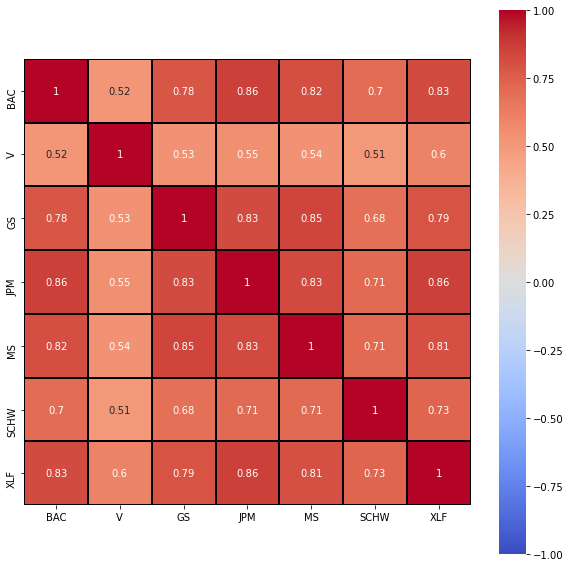

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(financial_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [38]:
energy_rets=pd.DataFrame()
energy_rets['XOM']=XOM['Daily Return']
energy_rets['SLB']=SLB['Daily Return']
energy_rets['KMI']=KMI['Daily Return']
energy_rets['TSLA']=TSLA['Daily Return']
energy_rets['CVX']=CVX['Daily Return']
energy_rets['HAL']=HAL['Daily Return']
energy_rets['XLE']=XLE['Daily Return']

energy_rets.reset_index()

Date       XOM       SLB       KMI      TSLA       CVX       HAL  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.003904  0.002831       NaN       NaN  0.007083  0.012800   
2    2010-01-06  0.008643  0.022288       NaN       NaN  0.000126  0.023697   
3    2010-01-07 -0.003142  0.010320       NaN       NaN -0.003767  0.002469   
4    2010-01-08 -0.004011  0.016401       NaN       NaN  0.001765  0.050493   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.018714 -0.026439 -0.008707  0.071314 -0.027015 -0.023675   
2752 2020-12-08  0.032763  0.017521 -0.002703  0.012653  0.008594  0.041645   
2753 2020-12-09  0.013258  0.006027 -0.010163 -0.069859 -0.012017 -0.012652   
2754 2020-12-10  0.028271  0.000428  0.012320  0.037371  0.032176  0.024603   
2755 2020-12-11 -0.004772 -0.018819 -0.002705 -0.027238 -0.009641 -0.008004   

           XLE  
0          NaN  
1     0.008162  
2     0.011975  
3    -0.001500  
4     0.006510  
...        ...  
2751 -0.023382  
2752  0.014869  
2753  0.002235  
2754  0.030723  
2755 -0.011538  

[2756 rows x 8 columns]

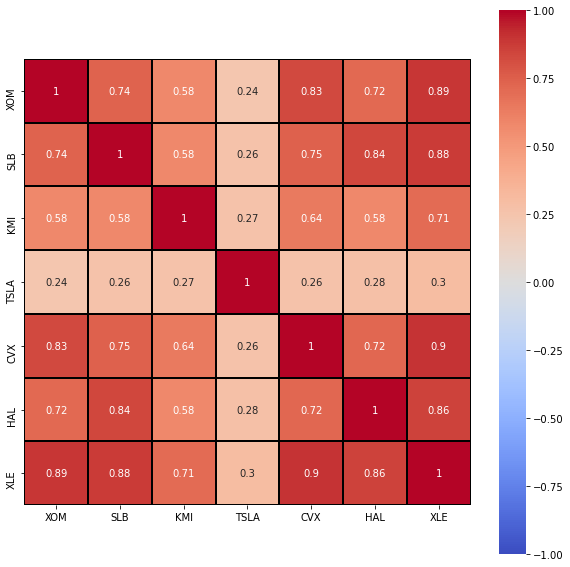

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(energy_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [40]:
consumer_discretionary_rets=pd.DataFrame()
consumer_discretionary_rets['HD']=HD['Daily Return']
consumer_discretionary_rets['SBUX']=SBUX['Daily Return']
consumer_discretionary_rets['NKE']=NKE['Daily Return']
consumer_discretionary_rets['MCD']=MCD['Daily Return']
consumer_discretionary_rets['CCL']=CCL['Daily Return']
consumer_discretionary_rets['BKNG']=BKNG['Daily Return']
consumer_discretionary_rets['XLY']=XLY['Daily Return']

consumer_discretionary_rets.reset_index()

Date        HD      SBUX       NKE       MCD       CCL      BKNG  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.007324  0.023427  0.003979 -0.007645  0.009670  0.011609   
2    2010-01-06 -0.003462 -0.007207 -0.006096 -0.013644 -0.017918 -0.033016   
3    2010-01-07  0.011814 -0.002562  0.009814  0.007323  0.011010 -0.013465   
4    2010-01-08 -0.004808 -0.003425 -0.001974 -0.000969  0.033603  0.000370   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.005114 -0.008506  0.011371 -0.008779 -0.010661  0.001765   
2752 2020-12-08 -0.003503 -0.001972  0.002667 -0.002394  0.015948 -0.019791   
2753 2020-12-09  0.014749 -0.008003 -0.002372  0.001440 -0.037336  0.009805   
2754 2020-12-10 -0.002899  0.049701 -0.008718 -0.003115 -0.016307 -0.001063   
2755 2020-12-11 -0.000982 -0.022678 -0.001236 -0.001346 -0.044803 -0.007440   

           XLY  
0          NaN  
1     0.003667  
2     0.001329  
3     0.008292  
4    -0.000329  
...        ...  
2751 -0.002278  
2752 -0.002093  
2753 -0.000953  
2754 -0.000891  
2755 -0.004776  

[2756 rows x 8 columns]

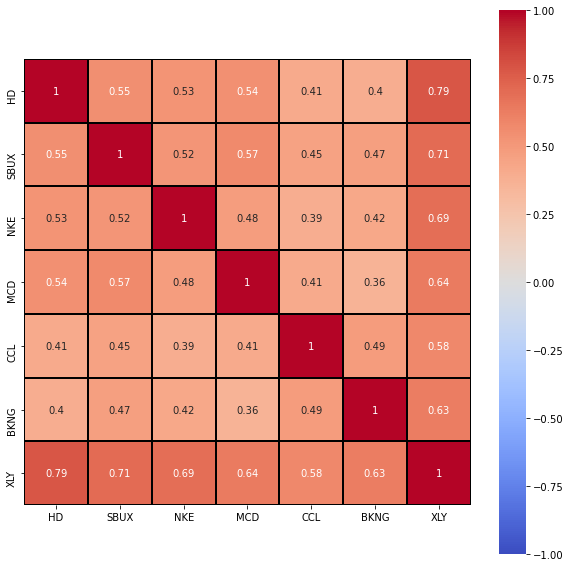

In [41]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(consumer_discretionary_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [42]:
information_technology_rets=pd.DataFrame()
information_technology_rets['AAPL']=AAPL['Daily Return']
information_technology_rets['MSFT']=MSFT['Daily Return']
information_technology_rets['CSCO']=CSCO['Daily Return']
information_technology_rets['INTC']=INTC['Daily Return']
information_technology_rets['ORCL']=ORCL['Daily Return']
information_technology_rets['IBM']=IBM['Daily Return']
information_technology_rets['XLK']=XLK['Daily Return']

information_technology_rets.reset_index()

Date      AAPL      MSFT      CSCO      INTC      ORCL       IBM  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.001729  0.000323 -0.004455 -0.000479 -0.001207 -0.012080   
2    2010-01-06 -0.015906 -0.006137 -0.006510 -0.003354 -0.014505 -0.006496   
3    2010-01-07 -0.001849 -0.010400  0.004505 -0.009615 -0.003271 -0.003462   
4    2010-01-08  0.006648  0.006897  0.005299  0.011165  0.012305  0.010035   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07  0.012270 -0.000327 -0.000676 -0.034430 -0.002668 -0.019654   
2752 2020-12-08  0.005091  0.008027  0.000451  0.009761 -0.012876  0.008099   
2753 2020-12-09 -0.020904 -0.019490  0.007212 -0.012231  0.011858  0.008591   
2754 2020-12-10  0.011989 -0.006043 -0.008279  0.003795 -0.004186 -0.014433   
2755 2020-12-11 -0.006735  0.013015  0.000000 -0.010545  0.018998 -0.005522   

           XLK  
0          NaN  
1    -0.001290  
2    -0.011187  
3    -0.003916  
4     0.006553  
...        ...  
2751  0.002856  
2752  0.003244  
2753 -0.019163  
2754  0.001447  
2755 -0.002087  

[2756 rows x 8 columns]

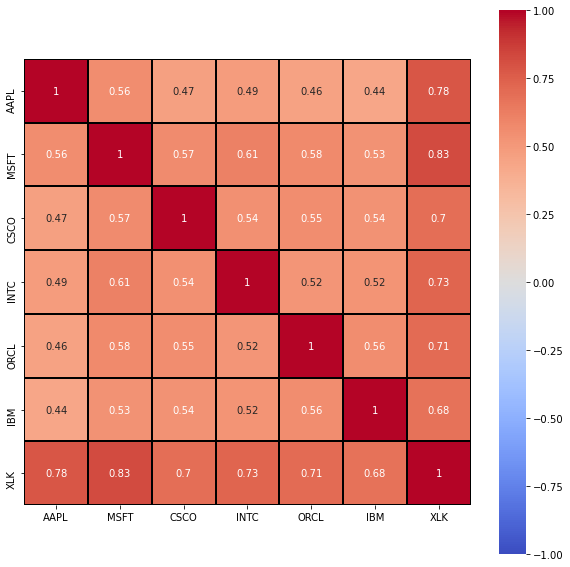

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(information_technology_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [44]:
communication_services_rets=pd.DataFrame()
communication_services_rets['VZ']=VZ['Daily Return']
communication_services_rets['FB']=FB['Daily Return']
communication_services_rets['DIS']=DIS['Daily Return']
communication_services_rets['CMCSA']=CMCSA['Daily Return']
communication_services_rets['T']=T['Daily Return']
communication_services_rets['NFLX']=NFLX['Daily Return']
communication_services_rets['XLC']=XLC['Daily Return']

communication_services_rets.reset_index()

Date        VZ        FB       DIS     CMCSA         T      NFLX  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05  0.001803       NaN -0.002495 -0.013553 -0.004898 -0.036836   
2    2010-01-06 -0.028754       NaN -0.005314 -0.007169 -0.014632  0.035139   
3    2010-01-07 -0.005953       NaN  0.000314  0.021059 -0.011228 -0.017254   
4    2010-01-08  0.000630       NaN  0.001570 -0.002946 -0.007326  0.017176   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.003249  0.021022 -0.002984  0.004643  0.003385  0.035059   
2752 2020-12-08  0.001630 -0.007634  0.000260 -0.010013  0.039474 -0.006049   
2753 2020-12-09  0.000163 -0.019337  0.004619 -0.002918  0.021097 -0.037179   
2754 2020-12-10 -0.015457 -0.002879  0.001684 -0.015217 -0.024475  0.015174   
2755 2020-12-11 -0.002644 -0.012883  0.135949  0.008914  0.010427  0.004251   

           XLC  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
2751  0.006271  
2752 -0.001484  
2753 -0.011887  
2754  0.000602  
2755  0.006011  

[2756 rows x 8 columns]

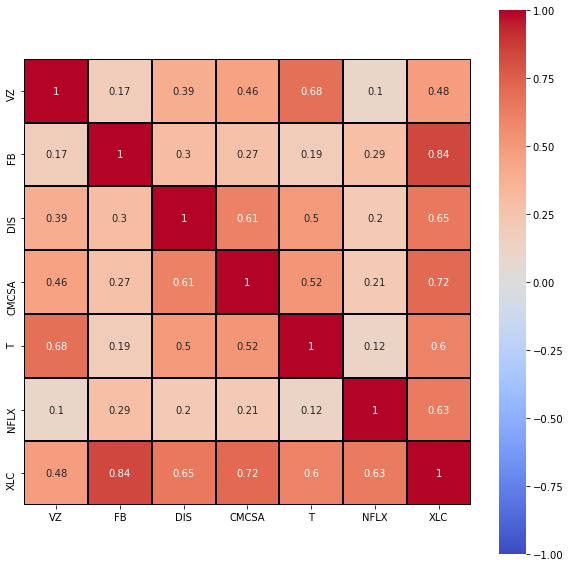

In [45]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(communication_services_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [46]:
real_estate_rets=pd.DataFrame()
real_estate_rets['RDFN']=RDFN['Daily Return']
real_estate_rets['AMT']=AMT['Daily Return']
real_estate_rets['SPG']=SPG['Daily Return']
real_estate_rets['PSA']=PSA['Daily Return']
real_estate_rets['PLD']=PLD['Daily Return']
real_estate_rets['EQIX']=EQIX['Daily Return']
real_estate_rets['VNQ']=VNQ['Daily Return']

real_estate_rets.reset_index()

Date      RDFN       AMT       SPG       PSA       PLD      EQIX  \
0   2017-07-28       NaN  0.025805 -0.034931  0.022998  0.006377  0.011358   
1   2017-07-31  0.111981 -0.014529 -0.012584  0.013459 -0.012023  0.006318   
2   2017-08-01  0.097389 -0.002641  0.038359 -0.013329  0.008716  0.005214   
3   2017-08-02  0.172961  0.014709 -0.019504 -0.003007 -0.002282  0.005275   
4   2017-08-03 -0.124276 -0.005944  0.003594 -0.009297 -0.001307 -0.013415   
..         ...       ...       ...       ...       ...       ...       ...   
846 2020-12-07  0.022391 -0.019242 -0.048344  0.000802 -0.011454 -0.015219   
847 2020-12-08  0.048562 -0.002943  0.008280 -0.012462 -0.006357 -0.003254   
848 2020-12-09  0.017072 -0.018649  0.008101 -0.010096 -0.004953 -0.024278   
849 2020-12-10  0.047321 -0.000137 -0.004403 -0.013932  0.007778  0.012662   
850 2020-12-11  0.017903  0.001869 -0.028085  0.016068  0.001955  0.002722   

          VNQ  
0   -0.002726  
1    0.001307  
2    0.004510  
3   -0.009097  
4   -0.002027  
..        ...  
846 -0.008679  
847 -0.003502  
848 -0.006208  
849 -0.004361  
850 -0.000947  

[851 rows x 8 columns]

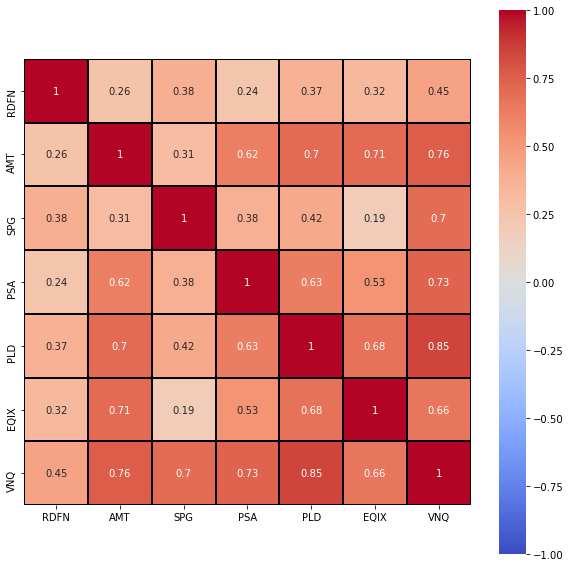

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(real_estate_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [48]:
health_care_rets=pd.DataFrame()
health_care_rets['JNJ']=JNJ['Daily Return']
health_care_rets['PFE']=PFE['Daily Return']
health_care_rets['UNH']=UNH['Daily Return']
health_care_rets['MRK']=MRK['Daily Return']
health_care_rets['ANTM']=ANTM['Daily Return']
health_care_rets['CI']=CI['Daily Return']
health_care_rets['XLV']=XLV['Daily Return']

health_care_rets.reset_index()

Date       JNJ       PFE       UNH       MRK      ANTM        CI  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05 -0.011596 -0.014263 -0.001586  0.004053  0.010878  0.016772   
2    2010-01-06  0.008134 -0.003216  0.009847  0.013455  0.016225 -0.002163   
3    2010-01-07 -0.007137 -0.003763  0.038377  0.001594  0.037146  0.036856   
4    2010-01-08  0.003438  0.008095 -0.009391 -0.000530  0.004398 -0.007580   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.008651  0.022558 -0.005802  0.006956 -0.012466  0.004319   
2752 2020-12-08  0.017319  0.031758  0.000000  0.008120  0.010807  0.000366   
2753 2020-12-09  0.010228 -0.016682 -0.009918  0.003486 -0.013171 -0.007637   
2754 2020-12-10 -0.005552 -0.002867 -0.013821 -0.005751 -0.014728 -0.020046   
2755 2020-12-11  0.004598 -0.014618 -0.007596 -0.000361 -0.007490 -0.015518   

           XLV  
0          NaN  
1    -0.009807  
2     0.010224  
3     0.003479  
4     0.001576  
...        ...  
2751 -0.006131  
2752  0.007599  
2753 -0.003461  
2754 -0.001692  
2755 -0.003924  

[2756 rows x 8 columns]

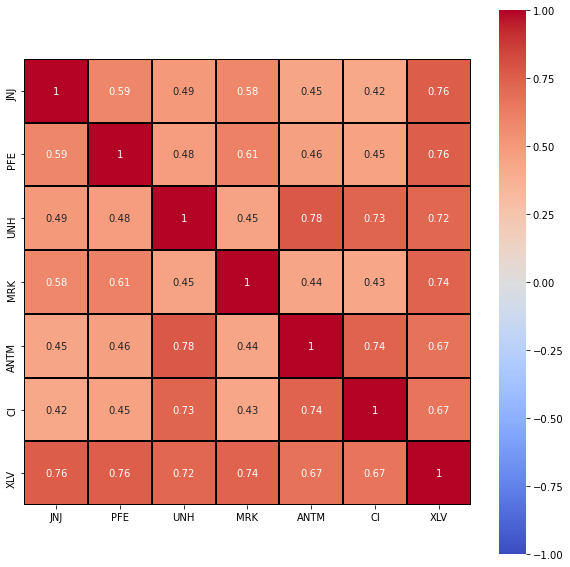

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(health_care_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [50]:
consumer_staples_rets=pd.DataFrame()
consumer_staples_rets['KO']=KO['Daily Return']
consumer_staples_rets['CL']=CL['Daily Return']
consumer_staples_rets['PG']=PG['Daily Return']
consumer_staples_rets['WMT']=WMT['Daily Return']
consumer_staples_rets['PEP']=PEP['Daily Return']
consumer_staples_rets['CLX']=CLX['Daily Return']
consumer_staples_rets['XLP']=XLP['Daily Return']

consumer_staples_rets.reset_index()

Date        KO        CL        PG       WMT       PEP       CLX  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05 -0.012097  0.008087  0.000327 -0.009958  0.012084  0.010907   
2    2010-01-06 -0.000355 -0.002275 -0.004743 -0.002235 -0.010003 -0.002576   
3    2010-01-07 -0.002485 -0.003960 -0.005423  0.000560 -0.006356 -0.009525   
4    2010-01-08 -0.018509 -0.017952 -0.001322 -0.005037 -0.003280  0.000163   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.015970  0.004234  0.001528 -0.005372 -0.003291  0.003150   
2752 2020-12-08  0.003586 -0.002576  0.002687  0.009047  0.001032  0.011316   
2753 2020-12-09  0.002821 -0.004931 -0.011880 -0.007896  0.001168 -0.011682   
2754 2020-12-10 -0.005250 -0.001888 -0.006598 -0.004671 -0.007001  0.000449   
2755 2020-12-11  0.005655  0.001064  0.007380 -0.000272  0.002074  0.005633   

           XLP  
0          NaN  
1     0.000375  
2    -0.000749  
3     0.000000  
4    -0.003376  
...        ...  
2751 -0.003844  
2752  0.005492  
2753 -0.003986  
2754 -0.004446  
2755  0.002233  

[2756 rows x 8 columns]

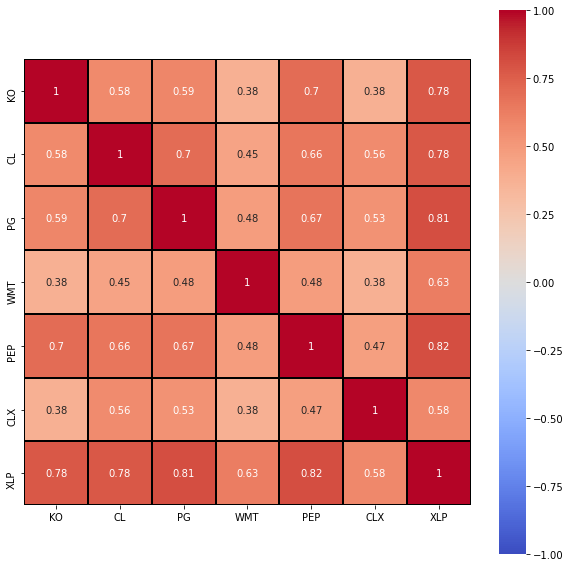

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(consumer_staples_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [52]:
utilities_rets=pd.DataFrame()
utilities_rets['NEE']=NEE['Daily Return']
utilities_rets['DUK']=DUK['Daily Return']
utilities_rets['EXC']=EXC['Daily Return']
utilities_rets['D']=D['Daily Return']
utilities_rets['ES']=ES['Daily Return']
utilities_rets['CNP']=CNP['Daily Return']
utilities_rets['XLU']=XLU['Daily Return']

utilities_rets.reset_index()

Date       NEE       DUK       EXC         D        ES       CNP  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05 -0.009765 -0.016500 -0.016366 -0.012320 -0.003493 -0.007576   
2    2010-01-06  0.009862  0.003595  0.006031  0.001039  0.012851 -0.009715   
3    2010-01-07 -0.002817  0.004776  0.003308  0.001558 -0.001538  0.009811   
4    2010-01-08 -0.008663  0.000594 -0.004739 -0.000518  0.002695 -0.011797   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07  0.010342  0.007899  0.006597  0.003426  0.014028  0.012248   
2752 2020-12-08  0.005596 -0.003919  0.002913 -0.018256 -0.004150 -0.027658   
2753 2020-12-09 -0.000136 -0.001311 -0.005566 -0.006020 -0.004168 -0.012000   
2754 2020-12-10 -0.005294  0.004049  0.002677  0.000269 -0.003836 -0.019343   
2755 2020-12-11  0.007096 -0.002398 -0.000243  0.007939  0.001167 -0.002294   

           XLU  
0          NaN  
1    -0.011905  
2     0.005861  
3    -0.004532  
4    -0.000976  
...        ...  
2751  0.005608  
2752 -0.003027  
2753 -0.001758  
2754 -0.005123  
2755  0.001609  

[2756 rows x 8 columns]

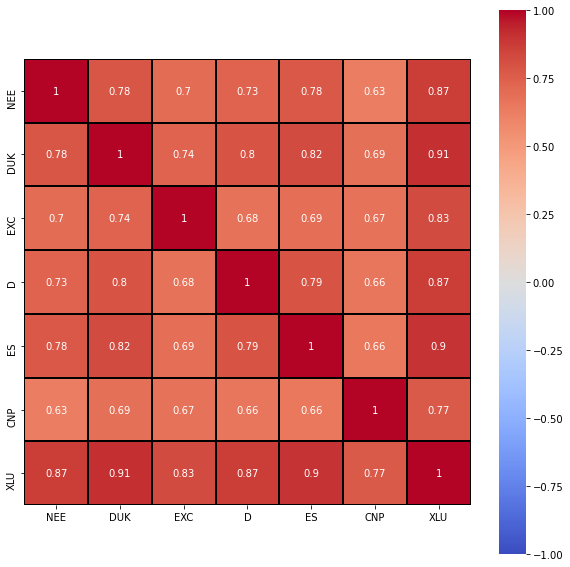

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(utilities_rets.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',
            square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

In [89]:
random_rets=pd.DataFrame()
random_rets['GOOG']=GOOG['Daily Return']
random_rets['AMZN']=AMZN['Daily Return']
random_rets['VTI']=VTI['Daily Return']
random_rets['VOO']=VOO['Daily Return']
random_rets['VTSMX']=VTSMX['Daily Return']
random_rets['SWTSX']=SWTSX['Daily Return']
random_rets['IWV']=IWV['Daily Return']
random_rets['WFIVX']=WFIVX['Daily Return']

random_rets.reset_index()

Date      GOOG      AMZN       VTI       VOO     VTSMX     SWTSX  \
0    2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
1    2010-01-05 -0.004404  0.005900  0.003839       NaN  0.002866  0.002988   
2    2010-01-06 -0.025209 -0.018116  0.001391       NaN  0.001429  0.000993   
3    2010-01-07 -0.023280 -0.017013  0.004166       NaN  0.004281  0.003968   
4    2010-01-08  0.013331  0.027077  0.003284       NaN  0.003197  0.003459   
...         ...       ...       ...       ...       ...       ...       ...   
2751 2020-12-07 -0.004655 -0.001448 -0.001097 -0.001854 -0.000966 -0.000907   
2752 2020-12-08 -0.000511  0.006108  0.004339  0.002889  0.004083  0.004083   
2753 2020-12-09 -0.018927 -0.023004 -0.009837 -0.008878 -0.009204 -0.009339   
2754 2020-12-10 -0.004932 -0.000873  0.001472 -0.000475  0.001512  0.001673   
2755 2020-12-11  0.003628  0.004814 -0.001785 -0.001276 -0.001833 -0.001821   

           IWV     WFIVX  
0          NaN       NaN  
1     0.002561  0.003071  
2     0.001953  0.001020  
3     0.003450  0.004077  
4     0.003587  0.003046  
...        ...       ...  
2751 -0.000863 -0.001112  
2752  0.003730  0.004083  
2753 -0.009380 -0.009242  
2754  0.001555  0.001119  
2755 -0.001690 -0.077898  

[2756 rows x 9 columns]

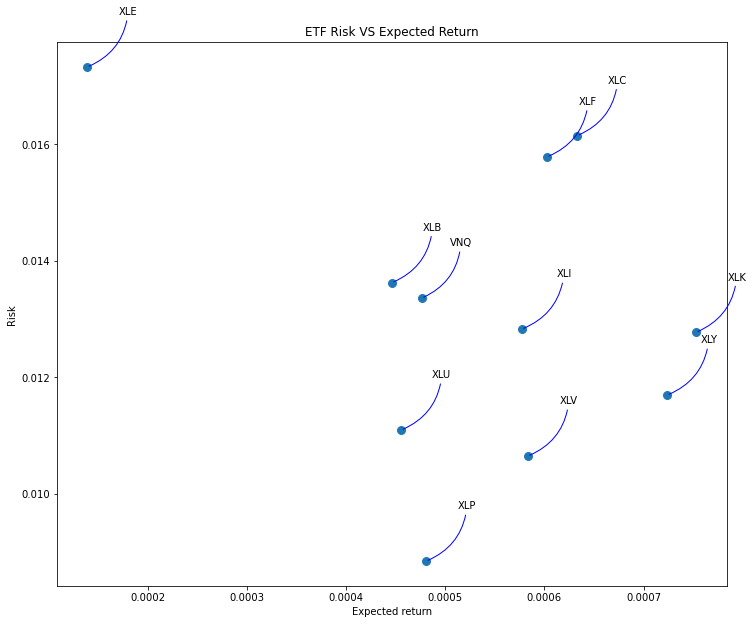

In [54]:
#Quantifying risk by comparing the expected return with the standard deviation of the daily returns

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(etf_rets.mean(), etf_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('ETF Risk VS Expected Return')

for label, x, y in zip(etf_rets.columns, etf_rets.mean(), etf_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

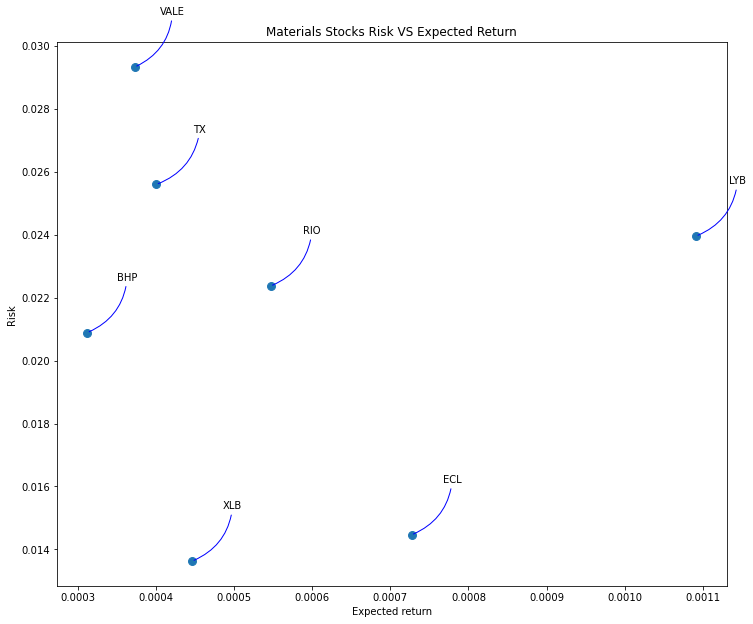

In [55]:
plt.figure(figsize=(12, 10))
plt.scatter(material_rets.mean(), material_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Materials Stocks Risk VS Expected Return')

for label, x, y in zip(material_rets.columns, material_rets.mean(), material_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

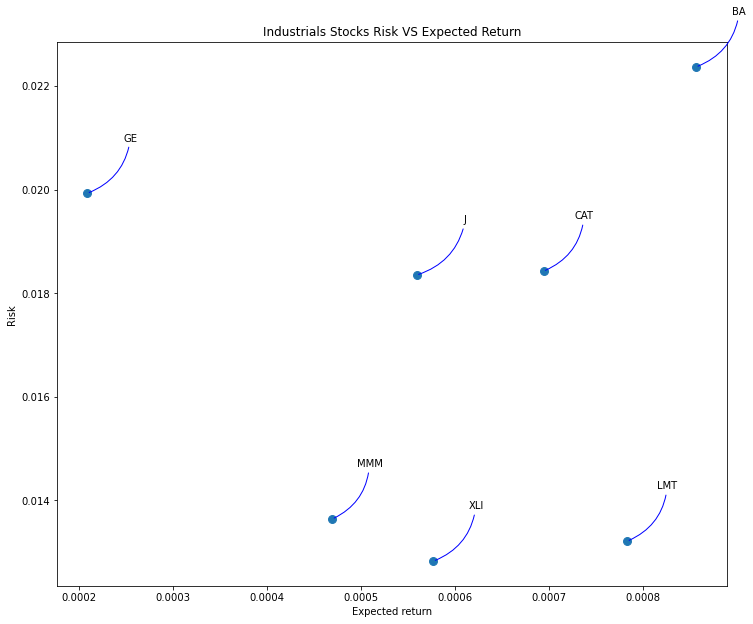

In [56]:
plt.figure(figsize=(12, 10))
plt.scatter(industrial_rets.mean(), industrial_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Industrials Stocks Risk VS Expected Return')

for label, x, y in zip(industrial_rets.columns, industrial_rets.mean(), industrial_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

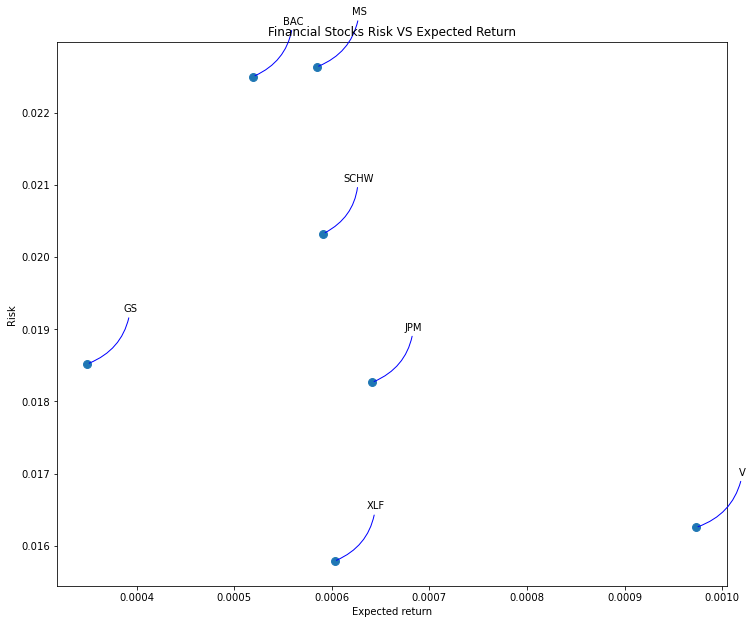

In [57]:
plt.figure(figsize=(12, 10))
plt.scatter(financial_rets.mean(), financial_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Financial Stocks Risk VS Expected Return')

for label, x, y in zip(financial_rets.columns, financial_rets.mean(), financial_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
    
#Visa seems like a good risk/return ratio

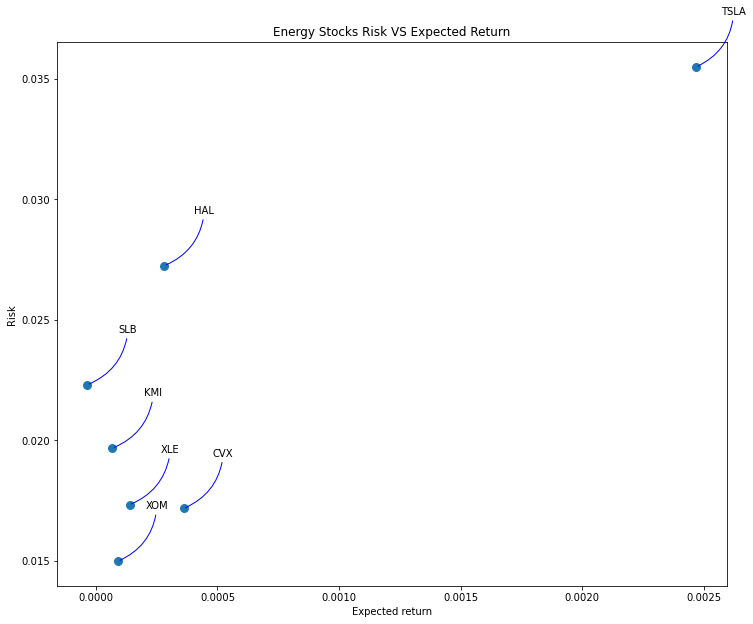

In [58]:
plt.figure(figsize=(12, 10))
plt.scatter(energy_rets.mean(), energy_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Energy Stocks Risk VS Expected Return')

for label, x, y in zip(energy_rets.columns, energy_rets.mean(), energy_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

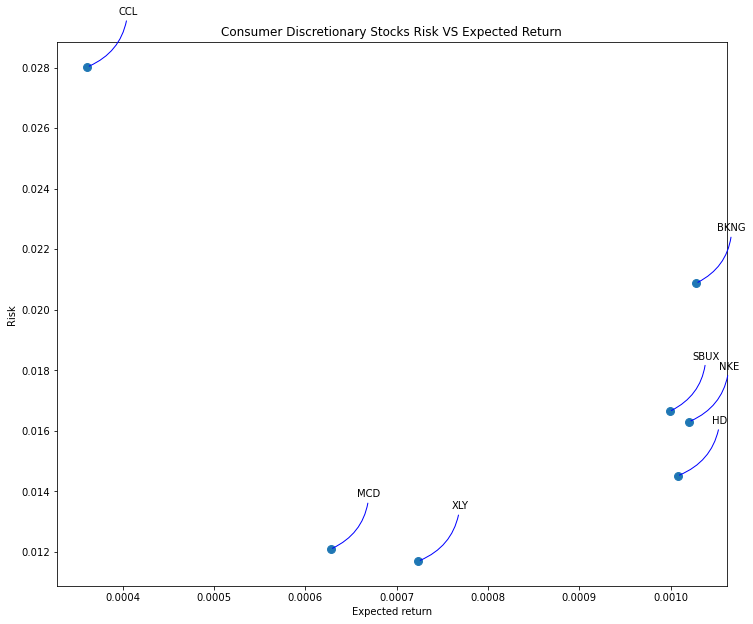

In [59]:
plt.figure(figsize=(12, 10))
plt.scatter(consumer_discretionary_rets.mean(), consumer_discretionary_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Consumer Discretionary Stocks Risk VS Expected Return')

for label, x, y in zip(consumer_discretionary_rets.columns, consumer_discretionary_rets.mean(), consumer_discretionary_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

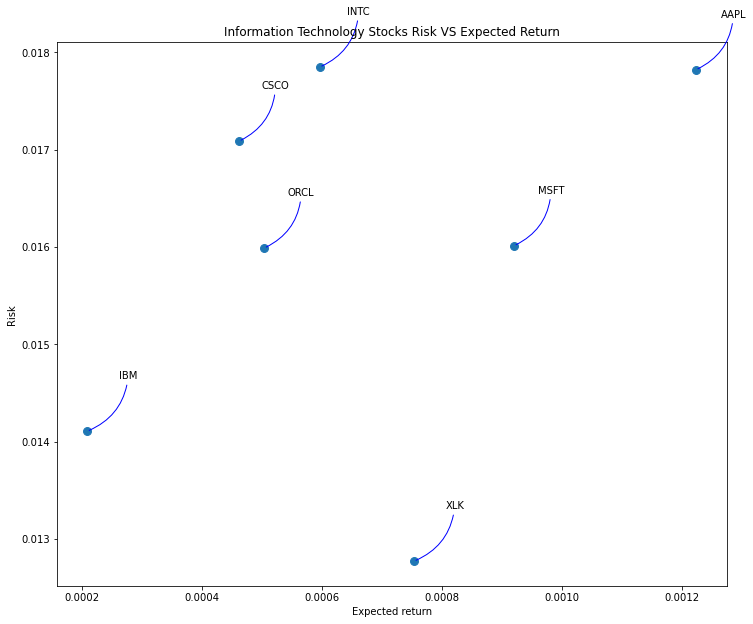

In [60]:
plt.figure(figsize=(12, 10))
plt.scatter(information_technology_rets.mean(), information_technology_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Information Technology Stocks Risk VS Expected Return')

for label, x, y in zip(information_technology_rets.columns, information_technology_rets.mean(), information_technology_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

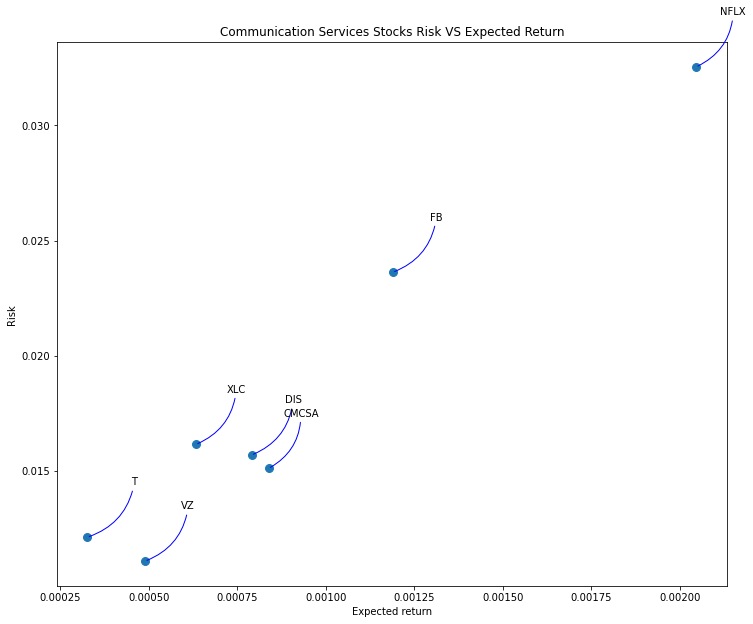

In [61]:
plt.figure(figsize=(12, 10))
plt.scatter(communication_services_rets.mean(), communication_services_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Communication Services Stocks Risk VS Expected Return')

for label, x, y in zip(communication_services_rets.columns, communication_services_rets.mean(), communication_services_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

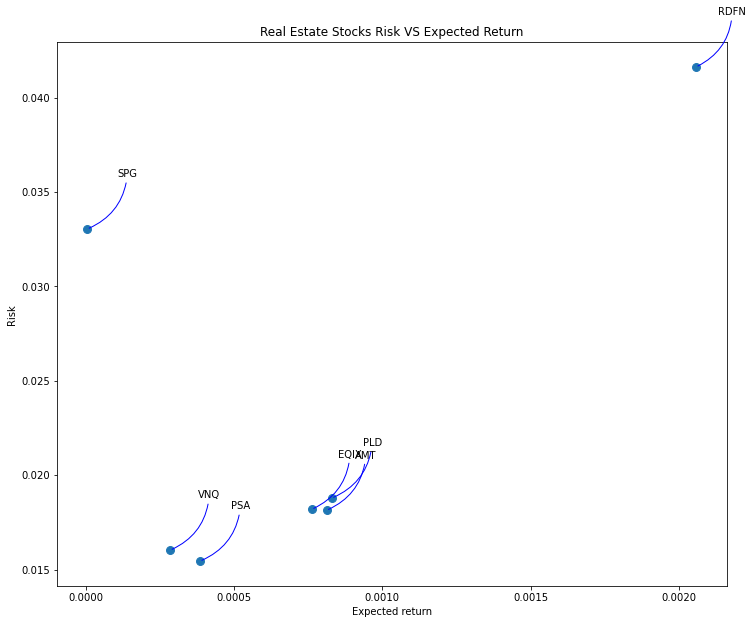

In [62]:
plt.figure(figsize=(12, 10))
plt.scatter(real_estate_rets.mean(), real_estate_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Real Estate Stocks Risk VS Expected Return')

for label, x, y in zip(real_estate_rets.columns, real_estate_rets.mean(), real_estate_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

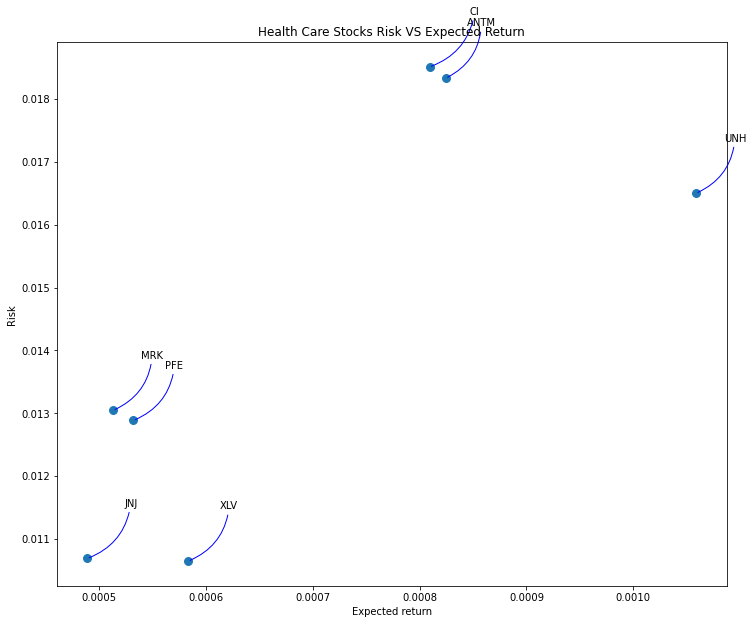

In [63]:
plt.figure(figsize=(12, 10))
plt.scatter(health_care_rets.mean(), health_care_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Health Care Stocks Risk VS Expected Return')

for label, x, y in zip(health_care_rets.columns, health_care_rets.mean(), health_care_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

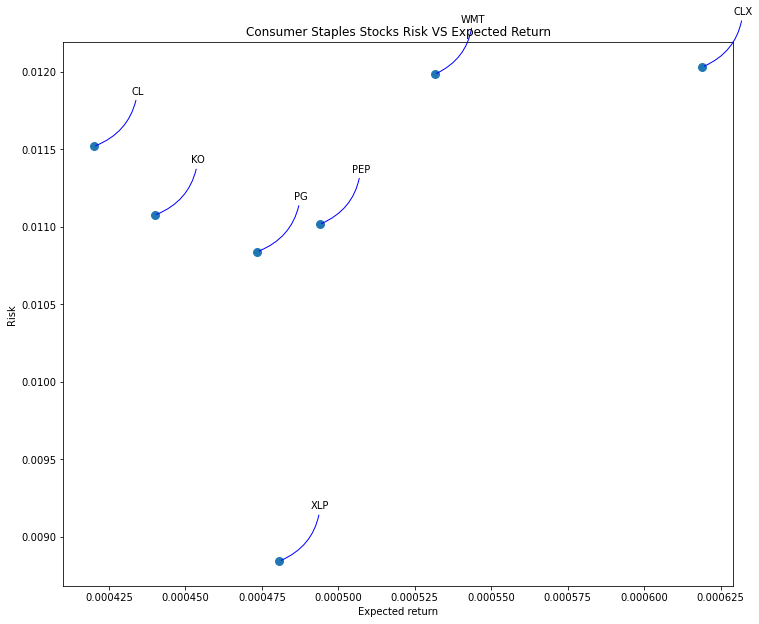

In [64]:
plt.figure(figsize=(12, 10))
plt.scatter(consumer_staples_rets.mean(), consumer_staples_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Consumer Staples Stocks Risk VS Expected Return')

for label, x, y in zip(consumer_staples_rets.columns, consumer_staples_rets.mean(), consumer_staples_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

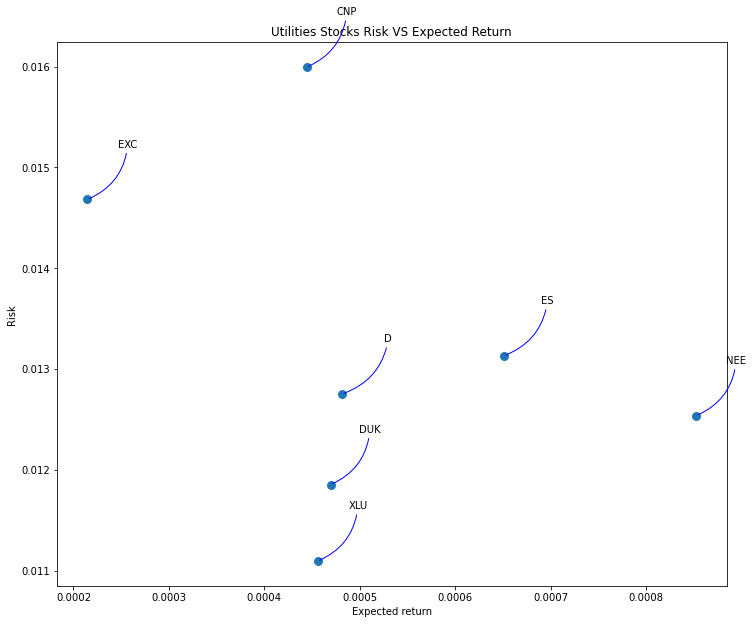

In [65]:
plt.figure(figsize=(12, 10))
plt.scatter(utilities_rets.mean(), utilities_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Utilities Stocks Risk VS Expected Return')

for label, x, y in zip(utilities_rets.columns, utilities_rets.mean(), utilities_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

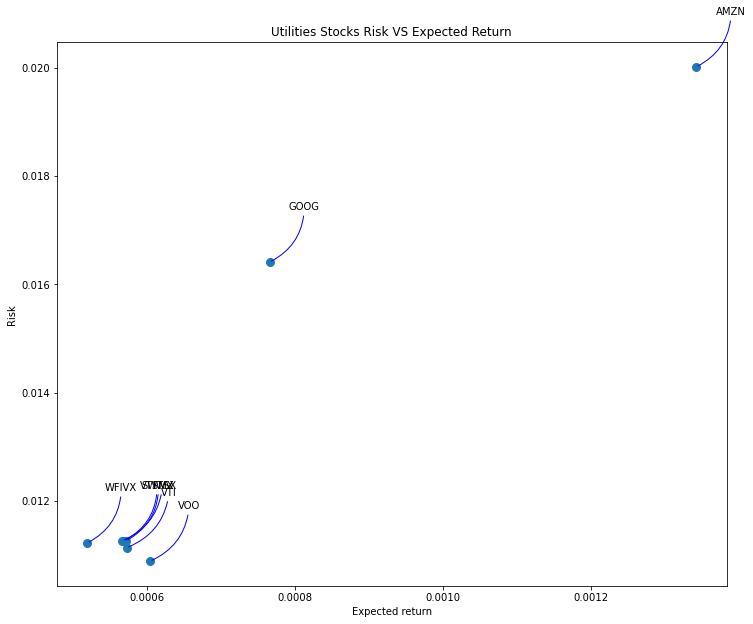

In [90]:
plt.figure(figsize=(12, 10))
plt.scatter(random_rets.mean(), random_rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Random Stocks Risk VS Expected Return')

for label, x, y in zip(random_rets.columns, random_rets.mean(), random_rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [66]:
ph_AAPL = AAPL.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 20 days',
                     'MA for 50 days', 'Daily Return'], axis=1)
ph_AAPL = ph_AAPL.reset_index()
ph_AAPL.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)
ph_AAPL = ph_AAPL.dropna()

ph_AAPL.tail()

ds           y
2751 2020-12-07  123.750000
2752 2020-12-08  124.379997
2753 2020-12-09  121.779999
2754 2020-12-10  123.239998
2755 2020-12-11  122.410004

In [67]:
m_AAPL = Prophet(daily_seasonality=True)
m_AAPL.fit(ph_AAPL)
future_AAPL=m_AAPL.make_future_dataframe(periods=365)
forecast_AAPL=m_AAPL.predict(future_AAPL)
forecast_AAPL

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-01-04    6.521060   -1.563988   12.503286     6.521060     6.521060   
1    2010-01-05    6.529166   -1.622545   12.819288     6.529166     6.529166   
2    2010-01-06    6.537272   -1.069339   12.568518     6.537272     6.537272   
3    2010-01-07    6.545378   -1.940901   12.323793     6.545378     6.545378   
4    2010-01-08    6.553484   -1.509357   12.432164     6.553484     6.553484   
...         ...         ...         ...         ...          ...          ...   
3116 2021-12-07  137.280749  128.095101  148.768098   130.086562   144.697511   
3117 2021-12-08  137.369644  128.602886  148.795497   130.147571   144.802179   
3118 2021-12-09  137.458540  127.486300  149.093770   130.208622   144.916397   
3119 2021-12-10  137.547435  128.657717  148.269799   130.266308   145.033783   
3120 2021-12-11  137.636331  128.181956  149.423802   130.324237   145.151169   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0          -1.035182             -1.035182             -1.035182  0.208392   
1          -0.987179             -0.987179             -0.987179  0.208392   
2          -0.934671             -0.934671             -0.934671  0.208392   
3          -0.923363             -0.923363             -0.923363  0.208392   
4          -0.979787             -0.979787             -0.979787  0.208392   
...              ...                   ...                   ...       ...   
3116        1.120735              1.120735              1.120735  0.208392   
3117        1.047145              1.047145              1.047145  0.208392   
3118        0.925073              0.925073              0.925073  0.208392   
3119        0.729802              0.729802              0.729802  0.208392   
3120        0.624850              0.624850              0.624850  0.208392   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     ... -0.012148     -0.012148     -0.012148 -1.231426     -1.231426   
1     ...  0.017688      0.017688      0.017688 -1.213260     -1.213260   
2     ...  0.049369      0.049369      0.049369 -1.192432     -1.192432   
3     ...  0.038271      0.038271      0.038271 -1.170026     -1.170026   
4     ... -0.041082     -0.041082     -0.041082 -1.147098     -1.147098   
...   ...       ...           ...           ...       ...           ...   
3116  ...  0.017688      0.017688      0.017688  0.894655      0.894655   
3117  ...  0.049369      0.049369      0.049369  0.789384      0.789384   
3118  ...  0.038271      0.038271      0.038271  0.678409      0.678409   
3119  ... -0.041082     -0.041082     -0.041082  0.562492      0.562492   
3120  ... -0.026049     -0.026049     -0.026049  0.442507      0.442507   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0        -1.231426                   0.0                         0.0   
1        -1.213260                   0.0                         0.0   
2        -1.192432                   0.0                         0.0   
3        -1.170026                   0.0                         0.0   
4        -1.147098                   0.0                         0.0   
...            ...                   ...                         ...   
3116      0.894655                   0.0                         0.0   
3117      0.789384                   0.0                         0.0   
3118      0.678409                   0.0                         0.0   
3119      0.562492                   0.0                         0.0   
3120      0.442507                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0    5.485878  
1                            0.0    5.541986  
2                            0.0    5.602601  
3                            0.0    5.622015  
4                            0.0    5.573696  
...                          ...         ...  
3116    

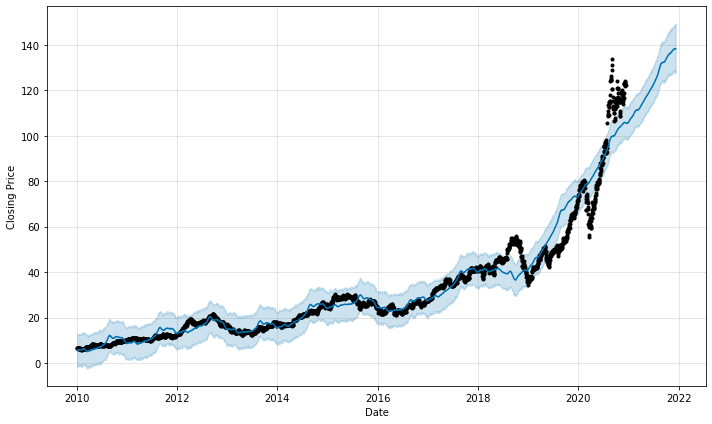

In [68]:
figure_AAPL=m_AAPL.plot(forecast_AAPL,xlabel='Date',ylabel='Closing Price')

In [69]:
ph_MSFT = MSFT.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 20 days',
                     'MA for 50 days', 'Daily Return'], axis=1)
ph_MSFT = ph_MSFT.reset_index()
ph_MSFT.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)
ph_MSFT = ph_MSFT.dropna()

ph_MSFT.tail()

ds           y
2751 2020-12-07  214.289993
2752 2020-12-08  216.009995
2753 2020-12-09  211.800003
2754 2020-12-10  210.520004
2755 2020-12-11  213.259995

In [70]:
m_MSFT = Prophet(changepoint_prior_scale=0.1)
m_MSFT.fit(ph_MSFT)
future_MSFT=m_MSFT.make_future_dataframe(periods=365)
forecast_MSFT=m_MSFT.predict(future_MSFT)
forecast_MSFT

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-01-04   24.974934   18.073423   30.164908    24.974934    24.974934   
1    2010-01-05   24.950486   17.736009   30.350682    24.950486    24.950486   
2    2010-01-06   24.926039   17.745819   29.645193    24.926039    24.926039   
3    2010-01-07   24.901591   17.642680   29.683270    24.901591    24.901591   
4    2010-01-08   24.877144   17.822034   29.927893    24.877144    24.877144   
...         ...         ...         ...         ...          ...          ...   
3116 2021-12-07  269.335865  255.510647  285.976725   256.687726   285.012081   
3117 2021-12-08  269.488819  254.989925  286.235712   256.784659   285.221645   
3118 2021-12-09  269.641772  254.782689  285.966440   256.886898   285.392759   
3119 2021-12-10  269.794726  254.671846  286.340146   256.999208   285.570974   
3120 2021-12-11  269.947679  254.524579  286.279671   257.111518   285.752985   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          -1.121722             -1.121722             -1.121722  0.157878   
1          -1.081755             -1.081755             -1.081755  0.206844   
2          -1.052917             -1.052917             -1.052917  0.237838   
3          -1.059099             -1.059099             -1.059099  0.227310   
4          -1.068570             -1.068570             -1.068570  0.207471   
...              ...                   ...                   ...       ...   
3116        0.081280              0.081280              0.081280  0.206844   
3117        0.097445              0.097445              0.097445  0.237838   
3118        0.071683              0.071683              0.071683  0.227310   
3119        0.035310              0.035310              0.035310  0.207471   
3120       -0.709501             -0.709501             -0.709501 -0.518670   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.157878      0.157878 -1.279599     -1.279599     -1.279599   
1         0.206844      0.206844 -1.288599     -1.288599     -1.288599   
2         0.237838      0.237838 -1.290755     -1.290755     -1.290755   
3         0.227310      0.227310 -1.286409     -1.286409     -1.286409   
4         0.207471      0.207471 -1.276040     -1.276040     -1.276040   
...            ...           ...       ...           ...           ...   
3116      0.206844      0.206844 -0.125564     -0.125564     -0.125564   
3117      0.237838      0.237838 -0.140393     -0.140393     -0.140393   
3118      0.227310      0.227310 -0.155627     -0.155627     -0.155627   
3119      0.207471      0.207471 -0.172160     -0.172160     -0.172160   
3120     -0.518670     -0.518670 -0.190831     -0.190831     -0.190831   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3116                   0.0                         0.0   
3117                   0.0                         0.0   
3118                   0.0                         0.0   
3119                   0.0                         0.0   
3120                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   23.853212  
1                            0.0   23.868732  
2                            0.0   23.873122  
3                            0.0   23.842492  
4                            0.0   23.808574  
...                          ...         ...  
3116                         0.0  269.417145  
3117                         0.0  269.586264  
3118                         0.0  269.713455  
3119                         0.0  269.830036  


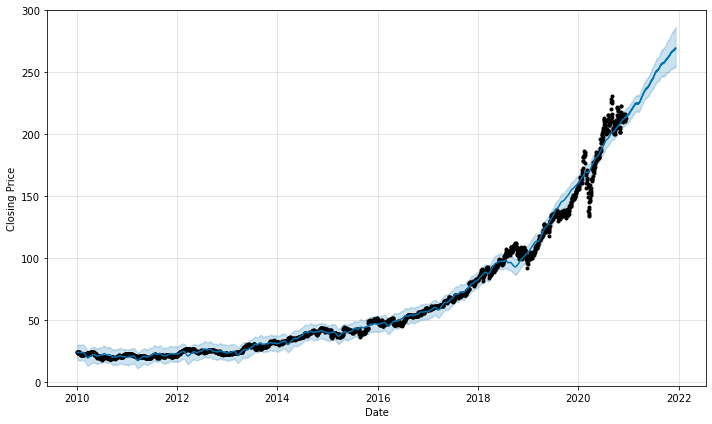

In [71]:
figure_MSFT=m_MSFT.plot(forecast_MSFT,xlabel='Date',ylabel='Closing Price')

In [72]:
ph_SLB = SLB.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 20 days',
                     'MA for 50 days', 'Daily Return'], axis=1)
ph_SLB = ph_SLB.reset_index()
ph_SLB.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)
ph_SLB = ph_SLB.dropna()

ph_SLB.tail()

ds          y
2751 2020-12-07  22.830000
2752 2020-12-08  23.230000
2753 2020-12-09  23.370001
2754 2020-12-10  23.379999
2755 2020-12-11  22.940001

In [73]:
m_SLB = Prophet(changepoint_prior_scale=0.2)
m_SLB.fit(ph_SLB)
future_SLB=m_SLB.make_future_dataframe(periods=365)
forecast_SLB=m_SLB.predict(future_SLB)
forecast_SLB

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-01-04  50.540677   45.913658   54.579461    50.540677    50.540677   
1    2010-01-05  50.511597   46.466419   54.885651    50.511597    50.511597   
2    2010-01-06  50.482518   46.263814   55.060738    50.482518    50.482518   
3    2010-01-07  50.453438   46.016689   54.933889    50.453438    50.453438   
4    2010-01-08  50.424359   46.668683   55.149539    50.424359    50.424359   
...         ...        ...         ...         ...          ...          ...   
3116 2021-12-07  -2.874622  -35.812932   33.436192   -35.871899    31.733985   
3117 2021-12-08  -2.917928  -34.639889   33.508452   -36.120177    31.911573   
3118 2021-12-09  -2.961234  -36.003688   33.067467   -36.367902    32.089162   
3119 2021-12-10  -3.004540  -36.817923   34.310567   -36.604278    32.271729   
3120 2021-12-11  -3.047847  -38.551742   30.208414   -36.840653    32.510311   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          -0.182045             -0.182045             -0.182045  0.613734   
1          -0.027153             -0.027153             -0.027153  0.697207   
2          -0.036705             -0.036705             -0.036705  0.614401   
3           0.052174              0.052174              0.052174  0.629431   
4           0.121879              0.121879              0.121879  0.625865   
...              ...                   ...                   ...       ...   
3116        1.225862              1.225862              1.225862  0.697207   
3117        1.031554              1.031554              1.031554  0.614401   
3118        0.930484              0.930484              0.930484  0.629431   
3119        0.807345              0.807345              0.807345  0.625865   
3120       -1.530640             -1.530640             -1.530640 -1.590319   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.613734      0.613734 -0.795778     -0.795778     -0.795778   
1         0.697207      0.697207 -0.724360     -0.724360     -0.724360   
2         0.614401      0.614401 -0.651106     -0.651106     -0.651106   
3         0.629431      0.629431 -0.577257     -0.577257     -0.577257   
4         0.625865      0.625865 -0.503986     -0.503986     -0.503986   
...            ...           ...       ...           ...           ...   
3116      0.697207      0.697207  0.528655      0.528655      0.528655   
3117      0.614401      0.614401  0.417153      0.417153      0.417153   
3118      0.629431      0.629431  0.301053      0.301053      0.301053   
3119      0.625865      0.625865  0.181481      0.181481      0.181481   
3120     -1.590319     -1.590319  0.059678      0.059678      0.059678   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3116                   0.0                         0.0   
3117                   0.0                         0.0   
3118                   0.0                         0.0   
3119                   0.0                         0.0   
3120                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0  50.358632  
1                            0.0  50.484445  
2                            0.0  50.445813  
3                            0.0  50.505613  
4                            0.0  50.546238  
...                          ...        ...  
3116                         0.0  -1.648760  
3117                         0.0  -1.886374  
3118                         0.0  -2.030750  
3119                         0.0  -2.197195  
3120                   

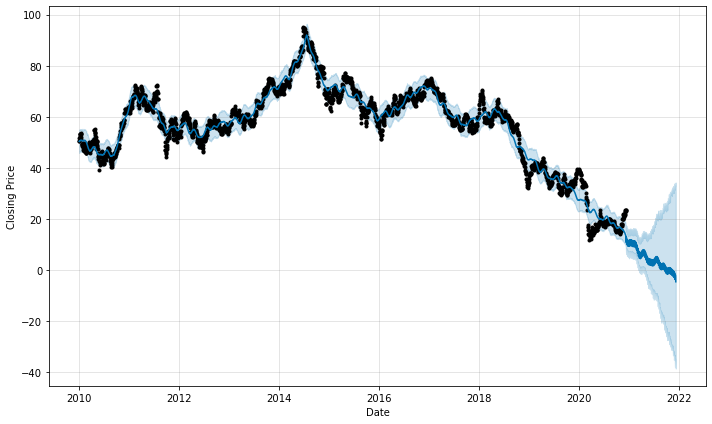

In [74]:
figure_SLB=m_SLB.plot(forecast_SLB,xlabel='Date',ylabel='Closing Price')

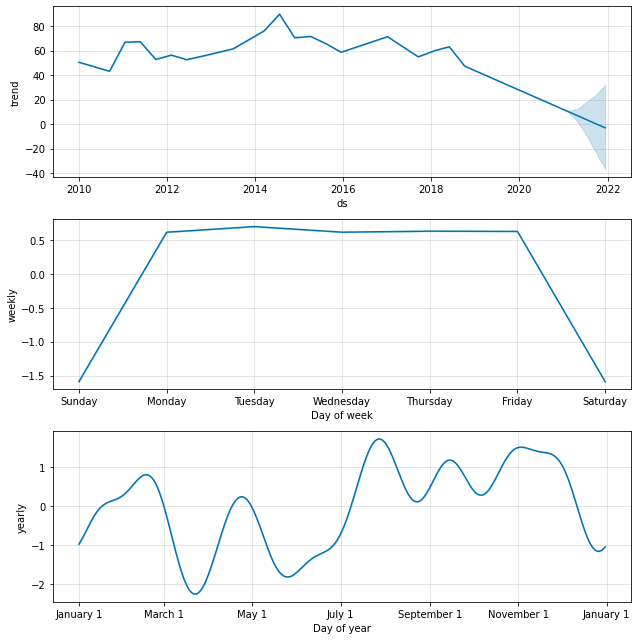

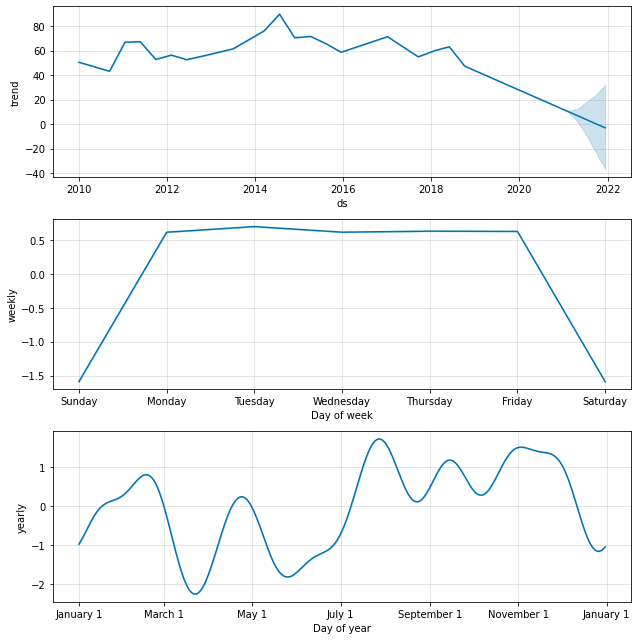

In [94]:
m_SLB.plot_components(forecast_SLB)

In [91]:
ph_V = V.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 20 days',
                     'MA for 50 days', 'Daily Return'], axis=1)
ph_V = ph_V.reset_index()
ph_V.rename(columns={'Adj Close': 'y', 'Date': 'ds'}, inplace=True)
ph_V = ph_V.dropna()

ph_V.tail()

ds           y
2751 2020-12-07  212.649994
2752 2020-12-08  212.770004
2753 2020-12-09  209.580002
2754 2020-12-10  207.610001
2755 2020-12-11  206.240005

In [92]:
m_V = Prophet(changepoint_prior_scale=0.2)
m_V.fit(ph_V)
future_V=m_V.make_future_dataframe(periods=365)
forecast_V=m_V.predict(future_SLB)
forecast_V

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2010-01-04   21.349381   14.337185   28.076310    21.349381    21.349381   
1    2010-01-05   21.328476   14.670980   28.568933    21.328476    21.328476   
2    2010-01-06   21.307570   14.990663   28.061299    21.307570    21.307570   
3    2010-01-07   21.286664   15.098590   28.283025    21.286664    21.286664   
4    2010-01-08   21.265759   15.128179   28.258174    21.265759    21.265759   
...         ...         ...         ...         ...          ...          ...   
3116 2021-12-07  239.338246  229.927436  249.844887   231.098327   247.172169   
3117 2021-12-08  239.424352  229.411957  249.921566   231.170403   247.291286   
3118 2021-12-09  239.510458  228.509960  250.528418   231.272448   247.407839   
3119 2021-12-10  239.596564  229.620954  251.046926   231.367933   247.524391   
3120 2021-12-11  239.682671  228.513591  249.997324   231.408351   247.640944   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          -0.079457             -0.079457             -0.079457  0.122675   
1           0.147614              0.147614              0.147614  0.250685   
2           0.274302              0.274302              0.274302  0.274329   
3           0.362082              0.362082              0.362082  0.256713   
4           0.497787              0.497787              0.497787  0.286389   
...              ...                   ...                   ...       ...   
3116        0.358099              0.358099              0.358099  0.250685   
3117        0.318756              0.318756              0.318756  0.274329   
3118        0.238055              0.238055              0.238055  0.256713   
3119        0.204665              0.204665              0.204665  0.286389   
3120       -0.739998             -0.739998             -0.739998 -0.595396   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0         0.122675      0.122675 -0.202132     -0.202132     -0.202132   
1         0.250685      0.250685 -0.103071     -0.103071     -0.103071   
2         0.274329      0.274329 -0.000027     -0.000027     -0.000027   
3         0.256713      0.256713  0.105369      0.105369      0.105369   
4         0.286389      0.286389  0.211398      0.211398      0.211398   
...            ...           ...       ...           ...           ...   
3116      0.250685      0.250685  0.107414      0.107414      0.107414   
3117      0.274329      0.274329  0.044427      0.044427      0.044427   
3118      0.256713      0.256713 -0.018659     -0.018659     -0.018659   
3119      0.286389      0.286389 -0.081724     -0.081724     -0.081724   
3120     -0.595396     -0.595396 -0.144602     -0.144602     -0.144602   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
3116                   0.0                         0.0   
3117                   0.0                         0.0   
3118                   0.0                         0.0   
3119                   0.0                         0.0   
3120                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   21.269925  
1                            0.0   21.476090  
2                            0.0   21.581872  
3                            0.0   21.648747  
4                            0.0   21.763546  
...                          ...         ...  
3116                         0.0  239.696345  
3117                         0.0  239.743108  
3118                         0.0  239.748513  
3119                         0.0  239.801229  


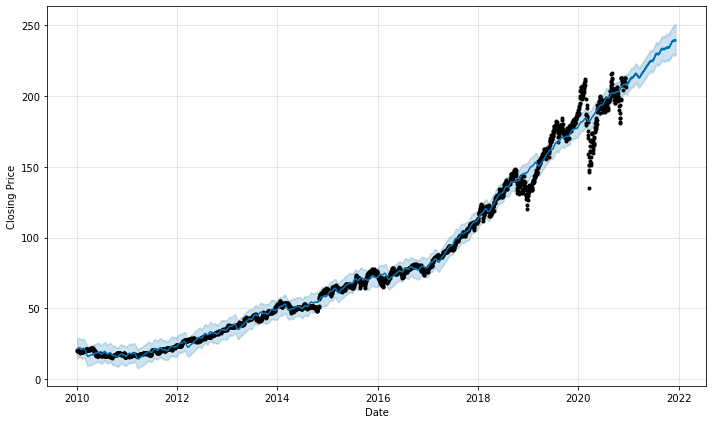

In [93]:
figure_V=m_V.plot(forecast_V,xlabel='Date',ylabel='Closing Price')

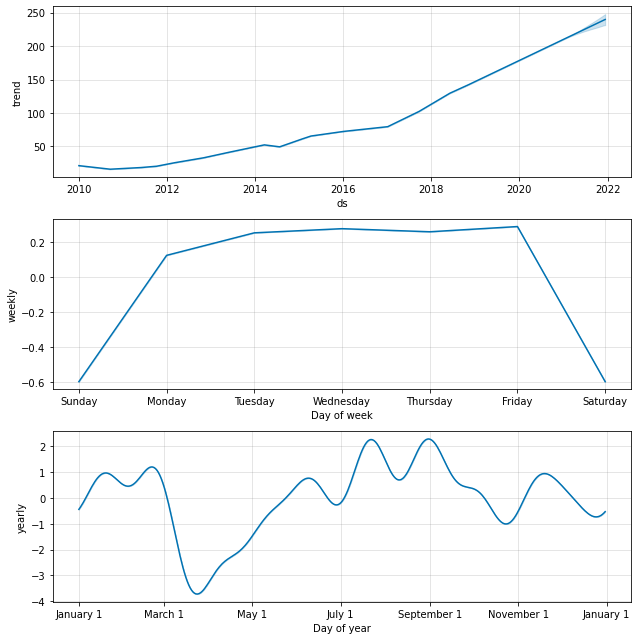

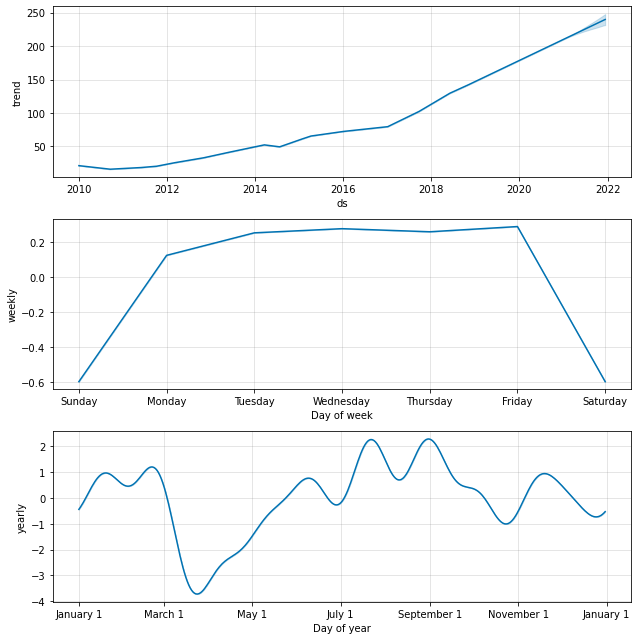

In [95]:
m_V.plot_components(forecast_V)

In [76]:
#Predict MSFT stock price 
#Create new dataset from Prophet data
ls_MSFT = ph_MSFT
#Rename columns to original names
ls_MSFT.rename(columns={'y': 'Adj Close', 'ds': 'Date'}, inplace=True)
#Set Date column as index
ls_MSFT.set_index('Date', inplace=True)
#Convert to numpy array
ls_MSFT_data = ls_MSFT.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil(len(ls_MSFT)*.8))
training_data_len



2205

In [77]:
from sklearn.preprocessing import MinMaxScaler
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(ls_MSFT_data)

scaled_data

array([[0.02826374],
       [0.02830031],
       [0.02760541],
       ...,
       [0.90962991],
       [0.90361936],
       [0.91648566]])

In [78]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02826374, 0.02830031, 0.02760541, 0.02643509, 0.02720315,
       0.02577683, 0.02504534, 0.02606939, 0.02830031, 0.02793458,
       0.02881236, 0.02694711, 0.02482593, 0.02098578, 0.02230242,
       0.02296071, 0.02358245, 0.02171724, 0.01813311, 0.01897428,
       0.01915713, 0.01977886, 0.01688964, 0.01754795, 0.01645074,
       0.01751135, 0.01743821, 0.01791367, 0.01721878, 0.01923968,
       0.02012154, 0.0215178 , 0.02078291, 0.02063592, 0.01916618,
       0.02026849, 0.02015828, 0.0204155 , 0.02170152, 0.01964388,
       0.01964388, 0.02026849, 0.02012154, 0.02026849, 0.02089312,
       0.0215178 , 0.0222894 , 0.02262014, 0.02269359, 0.02298758,
       0.02394286, 0.02386939, 0.02379591, 0.02383267, 0.02486149,
       0.02401637, 0.02533915, 0.02405314, 0.02379591, 0.0244573 ])]
[0.02269358680726101]

[array([0.02826374, 0.02830031, 0.02760541, 0.02643509, 0.02720315,
       0.02577683, 0.02504534, 0.02606939, 0.02830031, 0.02793458,
       0.02881236, 0.02694711, 0.02

In [79]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2145/2145 [==============================] - 69s 32ms/step - loss: 2.0125e-04


In [80]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = ls_MSFT_data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.806477554884433

<ipython-input-81-0a851aef1e55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


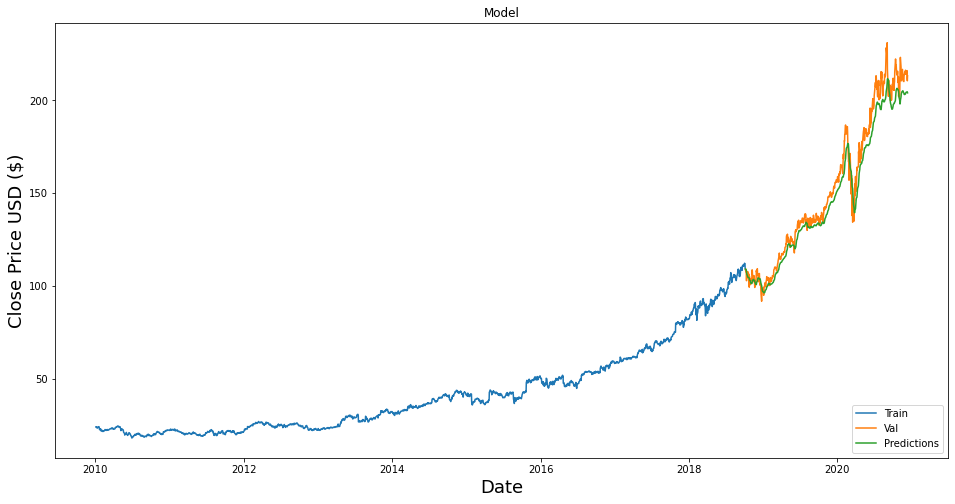

In [81]:
# Plot the data
train = ls_MSFT[:training_data_len]
valid = ls_MSFT[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [82]:
valid

Adj Close  Predictions
Date                               
2018-10-05  108.867607   109.127831
2018-10-08  107.624847   108.886223
2018-10-09  108.993813   108.462700
2018-10-10  103.071304   108.121048
2018-10-11  102.828575   107.286583
...                ...          ...
2020-12-07  214.289993   204.420563
2020-12-08  216.009995   204.462906
2020-12-09  211.800003   204.633118
2020-12-10  210.520004   204.451324
2020-12-11  213.259995   204.031372

[551 rows x 2 columns]